In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import pandas as pd
import duckdb
import numpy as np
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
print(matplotlib.matplotlib_fname())  # 显示 Matplotlib 配置文件路径
print(matplotlib.get_cachedir()) 

!cp /Users/liangkaixin/Documents/优惠券投放提效分析/SimHei.ttf /Users/liangkaixin/Documents/Notes/商业分析/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf

def query(sql):
    return duckdb.sql(sql)
def query_df(sql):
    return query(sql).df()
        

# **1. 指定字体文件路径**（修改为你的实际路径）
font_path = "/Users/liangkaixin/Documents/优惠券投放提效分析/SimHei.ttf"  # 例如放在项目的 fonts 目录下

# **2. 加载字体**
my_font = fm.FontProperties(fname=font_path)

# **3. 设置 Matplotlib 使用该字体**
plt.rcParams["font.family"] = my_font.get_name()
plt.rcParams["axes.unicode_minus"] = False  # 解决负号 '-' 显示问题

# 指定一个支持中文的字体 (如 SimHei)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或 'Microsoft YaHei', 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

pd.set_option('display.float_format', '{:.10f}'.format)

/Users/liangkaixin/Documents/Notes/商业分析/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc
/Users/liangkaixin/.matplotlib


# 背景介绍 **优惠券营销：提升获客与用户复购的关键策略**

优惠券营销是互联网行业进行**获客**和**提升用户复购**的重要手段之一，被广泛应用于**电商零售**和**生活服务行业**。在拉新过程中，企业通常会向新用户提供**大额优惠券**，以降低首次尝鲜门槛，促成交易并建立用户心智，实现业务的快速增长。

---

## **优惠券的主要分类**

在行业多年的实践和探索中，优惠券的营销玩法不断迭代。从分类角度来看，优惠券主要可以分为以下几类：

### **1️⃣ 按使用门槛划分**
- **无门槛券**：适用于**拉新**，让新用户以**低成本体验产品**，有助于建立品牌心智。  
- **有门槛券**：能够**提升用户客单价**，促进低客单价用户的消费欲望。  

### **2️⃣ 按优惠方式划分**
- **满减券**：用户需要凑单达到一定金额才能使用，能够**刺激用户消费**，提高订单金额。  
- **折扣券**：适用于**消费金额固定**但可选择不同品牌或平台的场景，如**出行打车**等，增强用户对平台的粘性。  

### **3️⃣ 按使用范围划分**
- **特定范围券**（品类券）：适用于**垂直业务定向运营**，如某类商品的专属折扣。  
- **通用券**：适用于**平台级运营**，提升整体用户活跃度和留存率。  

---

## **优惠券的挑战与优化方向**

近年来，由于营销手段的**过度使用**，**优惠券的发放量远超用户实际需求**，导致：
- **用户的“优惠感”减弱**，影响促销效果。
- **商家和平台的营销投入回报降低**。
- **部分用户“薅羊毛”行为加剧**，影响正常用户体验。

### **✅ 解决方案：个性化精准投放**
**通过数据分析优化投放策略**，可有效提升营销效果：
- **精准筛选目标用户**：分析用户收到优惠券后**核销使用的可能性**，找到最优投放群体。  
- **减少低效发放**：避免无效投放，降低优惠券浪费，提高ROI（投资回报率）。  
- **提升用户体验**：将优惠券精准匹配给**真正有需求**的用户，实现更好的营销效果。  

通过精准投放，**用户**能获得真正适合自己的优惠，**商家**能获得更高转化率，**平台**则能提升整体交易规模，从而实现**用户、商家、平台三赢**的局面。 🚀


分析目标

通过分析建模分析预测平台发券后用户的核销使用率，以促进平台和商户更加精准的开展营销投放动作，提升交易转化。

识别潜在业务漏洞及薅羊毛行为，助力风控规则的迭代及潜在风控对象的挖掘。

其他与本课题研究内容相关的业务目标均可。

**订单数据(order_detail)**

用户ID、订单ID、业务线名称、用户支付日期、用户实付交易额、补贴金额等字段信息。

|字段名|	字段说明|
|-----|--------|
|User_id|	用户登录后的唯一用户ID|
|Shop_id|	商户ID|
|Order_id|	订单ID|
|Coupon_id|	本次使用的优惠券ID|
|Coupon_type|	本次使用的优惠券类型|（用数字区分，不需要知道具体含义）
|Biz_code|	业务线名称|（用数字区分，不需要知道具体含义）
|Pay_date|	用户支付日期|
|Actual_pay|	用户实付交易额|（订单原价-补贴）
|Reduce_amount|	补贴金额|


**用户活跃(user_visit_detail)**

用户在美团各端（App、小程序等）的活跃日期、用户ID等字段信息

|字段名|	字段说明|
|-----|--------|
|Visit_date|	用户在美团各端（App、小程序等）的活跃日期，包括美团、美团外卖等各应用。|
|User_id|	用户登录后的唯一用户ID|


**用户获券数据(user_coupon_receive)**

包括用户在一段时间内通过购买、主动领取和平台主动发放的各类优惠券。其中商品立减等非优惠券补贴方式未涵盖在此数据中。


|字段名|	字段说明|
|------|-------|
|User_id|	用户登录后的唯一用户ID|
|Coupon_id|	优惠券ID|
|Coupon_status|	券状态(1-未使用 2-已使用 3-其他)|
|Coupon_amt|	券面额(单位：元)|
|Receive_time|	券获取时间(yyyy-MM-dd )|
|Start_time|	券生效开始时间(yyyy-MM-dd)|
|End_time|	券过期时间(yyyy-MM-dd)|
|Price_limit|	券使用门槛(单位：元)|

# 📊 **数据集说明**



本数据集提供的所有数据均来自**真实业务**，并经过**脱敏处理**，确保不涉及用户隐私信息。数据涵盖了**2023年1月1日 至 2023年6月30日**的订单及用户行为信息，共包含**5万名用户**的数据。

数据存储在**3个文件**中，具体字段及描述如下：

## 描述性统计(文字)

In [4]:
order_detail = pd.read_csv('/Users/liangkaixin/Documents/优惠券投放提效分析/order_detail.csv')
user_visit_detail = pd.read_csv('/Users/liangkaixin/Documents/优惠券投放提效分析/user_visit_detail.csv')
user_coupon_receive = pd.read_csv('/Users/liangkaixin/Documents/优惠券投放提效分析/user_coupon_receive.csv')

In [5]:
display(order_detail.info())
display(user_visit_detail.info())
display(user_coupon_receive.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543536 entries, 0 to 1543535
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   User_id        1543536 non-null  object 
 1   Shop_id        1522799 non-null  object 
 2   Order_id       1543536 non-null  object 
 3   Coupon_id      639960 non-null   object 
 4   Coupon_type    639830 non-null   float64
 5   Biz_code       1543536 non-null  object 
 6   Pay_date       1543536 non-null  object 
 7   Actual_pay     1543536 non-null  float64
 8   Reduce_amount  1543536 non-null  float64
dtypes: float64(3), object(6)
memory usage: 106.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2815177 entries, 0 to 2815176
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   User_id     object
 1   Visit_date  object
dtypes: object(2)
memory usage: 43.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179387 entries, 0 to 2179386
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   User_id        object 
 1   Coupon_id      object 
 2   Coupon_status  float64
 3   Coupon_amt     float64
 4   Receive_date   object 
 5   Start_date     object 
 6   End_date       object 
 7   Price_limit    float64
dtypes: float64(3), object(5)
memory usage: 133.0+ MB


None

In [6]:
display(order_detail.head(5))
display(user_visit_detail.head(5))
display(user_coupon_receive.head(5))

,User_id,Shop_id,Order_id,Coupon_id,Coupon_type,Biz_code,Pay_date,Actual_pay,Reduce_amount
0,1f434874e1371f4651011aec29e463a6,a6900d0b0e94121a05b8f076d793b36a,cf215ea951d8a8dc09002cd9e5b2d9ec,7e4ae1565cc015a44f10263d7ffe4dc0,1.0000000000,D,2023-02-10,30.0000000000,0.0000000000
1,fe845ad183d4ba6ebed2138dfa5fc933,4e08575cf11cfb11b9719e21bae525b0,1f8e69ba356e3c786e3e4de600db4f8a,0a52ebb2f236b558eb5deb0bb73c2613,1.0000000000,D,2023-03-26,22.3000000000,6.0000000000
2,56a8a58c7fa83d67862af639c9c5e63f,c89b4088551c6c98ba02c502b478a824,bb4ae29d7962a312adc450fe4c7f4965,20dd5ba437c64f36dfc0f71705324665,1.0000000000,D,2023-06-07,20.2000000000,0.0000000000
3,e24374a1fa8e24ed2a39ff614373735e,f4c9dd2982c4c4192b2e92b1928c502d,3f0912b08f064f50c571b0e91d7cf059,161aedbed0ff7ba4d5d204cfeb02ef1c,1.0000000000,D,2023-03-17,43.0000000000,4.0000000000
4,91ae4cda5ece690f65317eaa64f5c6d2,c7e657fc94b2c7316b5164569dc49834,6ffa6bf214d4e1ef20fec6ecf3a0c9ce,NaN,NaN,D,2023-02-15,21.7000000000,0.0000000000


,User_id,Visit_date
0,32a91327f9b7362967b7d16514635e16,2023-03-18
1,9ca8a9d70ce07addf37204b70bf2246d,2023-02-01
2,dc07b6243f082052cd7b97c8034bab65,2023-05-03
3,b836e40c1d6e2e2ebc432fb3c66af8cb,2023-06-30
4,aeee21d421b1c625c4e4432ffb2fb088,2023-02-01


,User_id,Coupon_id,Coupon_status,Coupon_amt,Receive_date,Start_date,End_date,Price_limit
0,198f3736deb018366b7e76a00ca61a24,61ce2f87cf1edf6e5f31520cda09b89a,2.0000000000,10.0000000000,2023-04-26,2023-04-26,2023-04-26,25.0000000000
1,c962d8f6542b0ec14a2cef371cf2f9b2,3aa11cc0f8698d5a2c9ce34bbf3bf919,3.0000000000,7.0000000000,2023-04-11,2023-04-11,2023-04-14,20.0000000000
2,9e9ffb33c7e434e0db6a599300860121,4d404e8b2765a960705288d5e16da562,3.0000000000,1.0000000000,2023-02-10,2023-02-10,2023-02-11,5.0000000000
3,f4e5fd8d8a7e6eb033e1e488a93827ae,31f89b13f0023f8d0a88eed43a64fb4a,3.0000000000,3.0000000000,2023-04-06,2023-04-06,2023-04-09,12.0000000000
4,870c5425bc174a7b578185cff9701ebd,3e2e32d8aac9adf7748698cb58e9ebd4,1.0000000000,5.0000000000,2023-05-17,2023-05-17,2023-05-24,30.0000000000


In [7]:
user_coupon_receive.describe().info() 

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Coupon_status  8 non-null      float64
 1   Coupon_amt     8 non-null      float64
 2   Price_limit    8 non-null      float64
dtypes: float64(3)
memory usage: 256.0+ bytes


In [8]:
order_detail.describe()

,Coupon_type,Actual_pay,Reduce_amount
count,639830.0000000000,1543536.0000000000,1543536.0000000000
mean,277.6431208290,38.9114167276,1.4435685404
std,2004.7185017906,70.9594274593,5.2437157963
min,0.0000000000,0.0000000000,0.0000000000
25%,1.0000000000,17.4000000000,0.0000000000
50%,1.0000000000,24.4000000000,0.0000000000
75%,1.0000000000,38.3000000000,2.0000000000
max,20014.0000000000,41840.0000000000,1599.0000000000


## 描述性统计(图)

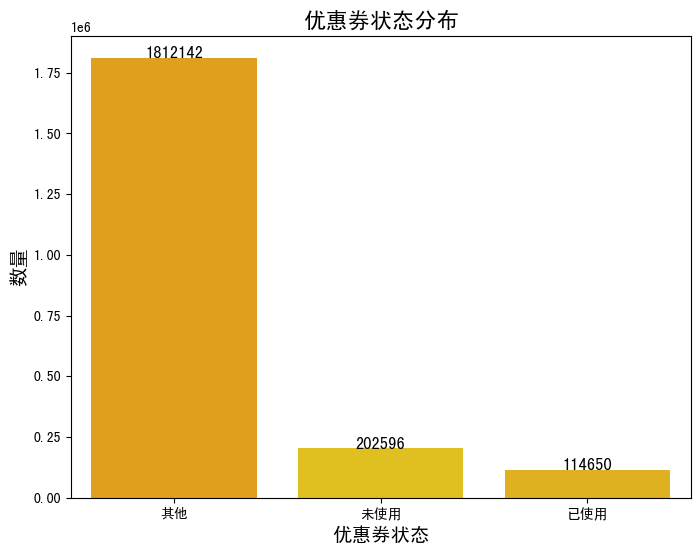

In [9]:
# Count the occurrences of each value in 'Coupon_status'
# Map the numeric Coupon_status to categories

color_map = {
    1: '#FFD500',  # 1: 未使用
    2: '#ffc000',  # 2: 已使用
    3: '#ffab00'   # 3: 其他
}


status_mapping = {1: '未使用', 2: '已使用', 3: '其他'}
user_coupon_receive['Coupon_status_trans'] = user_coupon_receive['Coupon_status'].map(status_mapping)
coupon_status_counts = user_coupon_receive['Coupon_status_trans'].value_counts().reset_index()
coupon_status_counts.columns = ['Coupon_status', 'Count']
# 颜色映射
color_map = {
    '未使用': '#FFD500',  
    '已使用': '#ffc000',  
    '其他': '#ffab00'   
}

# 统计优惠券状态数量
coupon_status_counts = user_coupon_receive['Coupon_status_trans'].value_counts()

# 设置画布
plt.figure(figsize=(8, 6))

# 绘制柱状图
sns.barplot(
    x=coupon_status_counts.index, 
    y=coupon_status_counts.values, 
    palette=[color_map[status] for status in coupon_status_counts.index]
)

# 设置标题和标签
plt.title("优惠券状态分布", fontsize=16)
plt.xlabel("优惠券状态", fontsize=14)
plt.ylabel("数量", fontsize=14)

# 显示数值标签
for i, v in enumerate(coupon_status_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12)

# 显示图表
plt.show()

## 优惠券金额与门槛金额分布对比

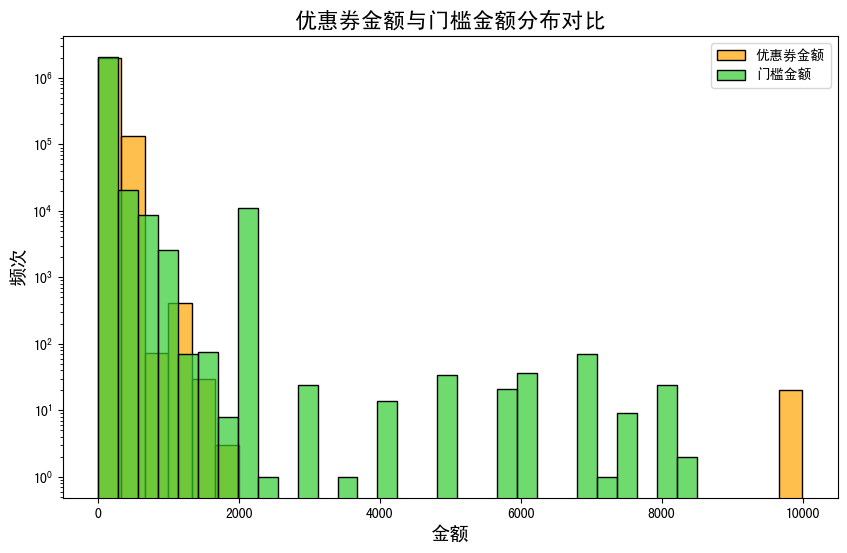

In [10]:
# 设置画布大小
plt.figure(figsize=(10, 6))

# 绘制 优惠券金额 的直方图
sns.histplot(user_coupon_receive['Coupon_amt'], bins=30, color='#FFA500', alpha=0.7, label='优惠券金额')

# 绘制 门槛金额 的直方图
sns.histplot(user_coupon_receive['Price_limit'], bins=30, color='#32CD32', alpha=0.7, label='门槛金额')

# 设置对数 y 轴
plt.yscale('log')

# 设置图表标题和标签
plt.title("优惠券金额与门槛金额分布对比", fontsize=16)
plt.xlabel("金额", fontsize=14)
plt.ylabel("频次", fontsize=14)

# 显示图例
plt.legend()

# 显示图表
plt.show()

## 优惠券类型分析

## 描述性统计

无门槛优惠券 Price_limit = 0

有门槛优惠券 Price_limit > 0

折扣券: 无面值




In [11]:
df = query_df('''
select 
        coupon_type,      
        count(*) as 领券次数,
        sum(Coupon_amt) / count(*) as 券均面值,
        sum(End_date::date - Start_date::date) / count(*) as 券均有效期长度,  
        sum(Price_limit) / count(*) as 券均使用门槛
from user_coupon_receive
left join (select distinct coupon_id, coupon_type from order_detail) using(coupon_id)        
group by 1
order by Coupon_type
''')
display(df)

,Coupon_type,领券次数,券均面值,券均有效期长度,券均使用门槛
0,0.0000000000,126,12.8888888889,45.4841269841,75.9448412698
1,1.0000000000,97542,5.8741960386,12.2196387197,16.2389124685
2,2.0000000000,847,11.4271546635,8.8831168831,1.8158205431
3,3.0000000000,926,68.7073434125,10.7721382289,1113.4665226782
4,4.0000000000,1406,519.5199146515,18.7816500711,22.0583214794
5,5.0000000000,200,5.9550000000,28.0400000000,0.0000000000
6,9.0000000000,18,6.9444444444,2.3333333333,28.4444444444
7,10.0000000000,77,3.8437662338,1.0129870130,0.0000000000
8,10010.0000000000,1097,NaN,5.1804922516,NaN
9,10012.0000000000,49,NaN,1.2857142857,NaN


,Coupon_type,商品平均价格,券均优惠价格,优惠比例,使用比例,使用次数,log_使用次数
0,0.0000000000,246,2.6240681576,1.0671126828,0.1467577325,939,6.8458798753
1,1.0000000000,34,2.3050967231,6.7622172465,89.1554006533,570443,13.2541702840
2,2.0000000000,33,3.0172434766,9.0978488660,0.7966178516,5097,8.5366035849
3,3.0000000000,133,7.0602147385,5.2943713727,3.6245565228,23191,10.0515626706
4,4.0000000000,191,1.8468000936,0.9679794784,1.3353547036,8544,9.0531015955
5,5.0000000000,55,8.1893552995,14.9355591872,0.2034915524,1302,7.1724245771
6,6.0000000000,43,0.0595479536,0.1390072039,2.5584920995,16370,9.7032667559
7,9.0000000000,46,8.9276344086,19.2073417587,0.0145351109,93,4.5432947823
8,10.0000000000,56,3.8614691943,6.8875066781,0.0659550193,422,6.0473721790
9,11.0000000000,76,3.5571428571,4.6605648829,0.0010940406,7,2.0794415417


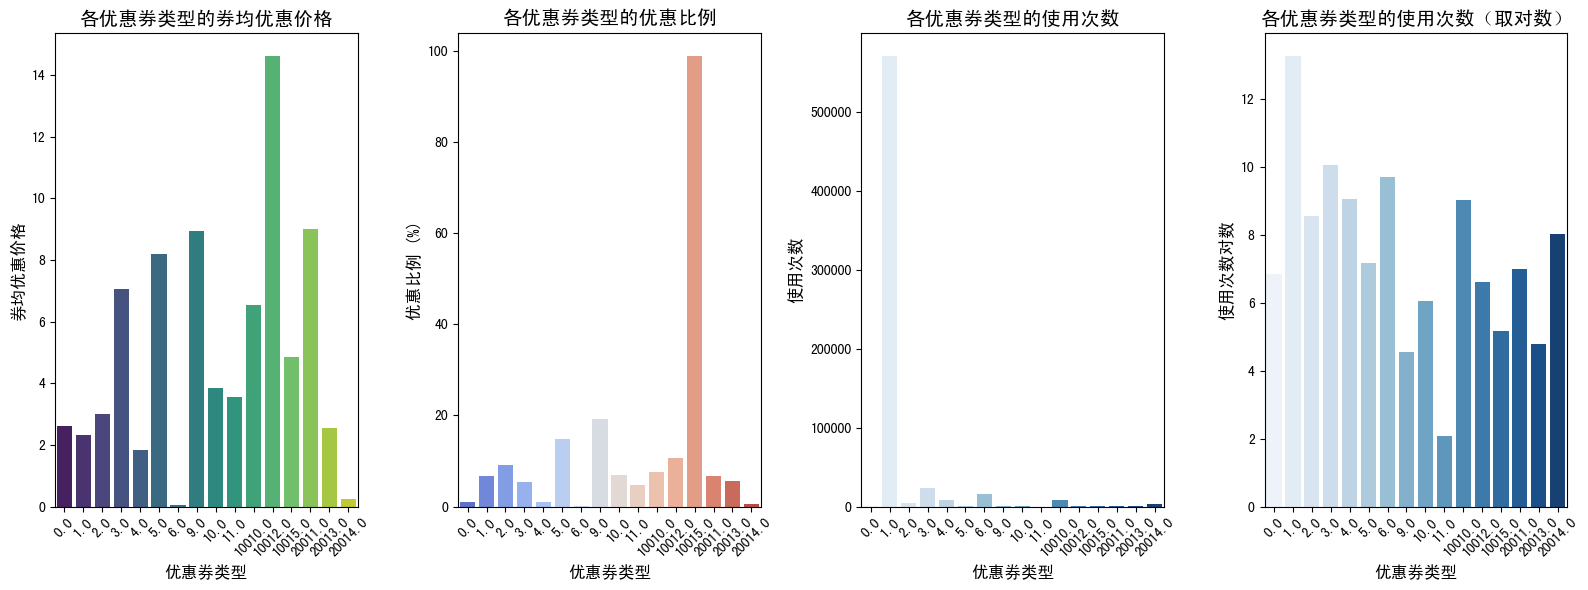

In [12]:
df = query_df('''
select 
        coupon_type,
        AVG(Actual_pay + Reduce_amount)::INT AS 商品平均价格,
        sum(reduce_amount) / count(*) as 券均优惠价格,
        sum(reduce_amount) * 100 / sum(actual_pay + reduce_amount) as 优惠比例,
        count(*) / (select count(*) from order_detail where coupon_type is not null) * 100 as 使用比例,
        count(*) 使用次数
from order_detail       
where coupon_type is not null
group by 1
order by Coupon_type
''')
df['log_使用次数'] = np.log(df['使用次数'] + 1)
display(df)

# 创建画布
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

# 绘制 券均优惠价格 的条形图
sns.barplot(x='Coupon_type', y='券均优惠价格', data=df, ax=axes[0], palette="viridis")
axes[0].set_title("各优惠券类型的券均优惠价格", fontsize=14)
axes[0].set_xlabel("优惠券类型", fontsize=12)
axes[0].set_ylabel("券均优惠价格", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# 绘制 优惠比例 的条形图
sns.barplot(x='Coupon_type', y='优惠比例', data=df, ax=axes[1], palette="coolwarm")
axes[1].set_title("各优惠券类型的优惠比例", fontsize=14)
axes[1].set_xlabel("优惠券类型", fontsize=12)
axes[1].set_ylabel("优惠比例 (%)", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# 绘制 使用次数 的条形图
sns.barplot(x='Coupon_type', y='使用次数', data=df, ax=axes[2], palette="Blues")
axes[2].set_title("各优惠券类型的使用次数", fontsize=14)
axes[2].set_xlabel("优惠券类型", fontsize=12)
axes[2].set_ylabel("使用次数", fontsize=12)
axes[2].tick_params(axis='x', rotation=45)


# 绘制 使用次数 的条形图
sns.barplot(x='Coupon_type', y='log_使用次数', data=df, ax=axes[3], palette="Blues")
axes[3].set_title("各优惠券类型的使用次数（取对数）", fontsize=14)
axes[3].set_xlabel("优惠券类型", fontsize=12)
axes[3].set_ylabel("使用次数对数", fontsize=12)
axes[3].tick_params(axis='x', rotation=45)

# 调整布局
plt.tight_layout()
plt.show()

要对这些优惠券数据进行分类，我们可以根据不同的特征值（如：券均优惠价格、优惠比例等）来定义不同的类别。以下是几种可能的分类方式：

1. 按优惠比例分类
根据“优惠比例”来进行分类。可以按照优惠比例的不同划分成几类。例如：

高优惠：优惠比例大于某个阈值（例如，10%）。

中等优惠：优惠比例在某个范围内（例如，5%-10%）。

低优惠：优惠比例低于某个阈值（例如，5%）。

2. 按券均优惠价格分类
根据“券均优惠价格”来进行分类。比如：

高价优惠券：券均优惠价格较高。

低价优惠券：券均优惠价格较低。

3. 按优惠券类型分类
根据“Coupon_type”来对优惠券进行类别划分。你可以为不同的Coupon_type赋予不同的类别标签。

4. 综合分类
根据多个特征（如优惠比例和券均优惠价格）来综合分类，可能有以下几种类别：

高价值优惠券：优惠比例和券均优惠价格都较高。

中等价值优惠券：优惠比例和券均优惠价格都在中间。

低价值优惠券：优惠比例和券均优惠价格都较低。

In [13]:
query('''WITH coupon_stats AS (
    SELECT 
        coupon_type,
        SUM(reduce_amount) / COUNT(*) AS 券均优惠价格,
        SUM(reduce_amount) * 100.0 / SUM(actual_pay + reduce_amount) AS 优惠比例,
        COUNT(*) AS 使用次数
    FROM order_detail       
    WHERE coupon_type IS NOT NULL
    GROUP BY 1
)
SELECT 
    PERCENTILE_CONT(0.2) WITHIN GROUP (ORDER BY 券均优惠价格) AS p20_券均优惠价格,
    PERCENTILE_CONT(0.2) WITHIN GROUP (ORDER BY 优惠比例) AS p20_优惠比例,
    PERCENTILE_CONT(0.2) WITHIN GROUP (ORDER BY 使用次数) AS p20_使用次数
FROM coupon_stats;
''')



┌────────────────────┬────────────────────┬──────────────┐
│  p20_券均优惠价格  │    p20_优惠比例    │ p20_使用次数 │
│       double       │       double       │    double    │
├────────────────────┼────────────────────┼──────────────┤
│ 2.3050967230731225 │ 1.0671126828117985 │        172.0 │
└────────────────────┴────────────────────┴──────────────┘

## 分类依据

### 选择1 Kmeans分类

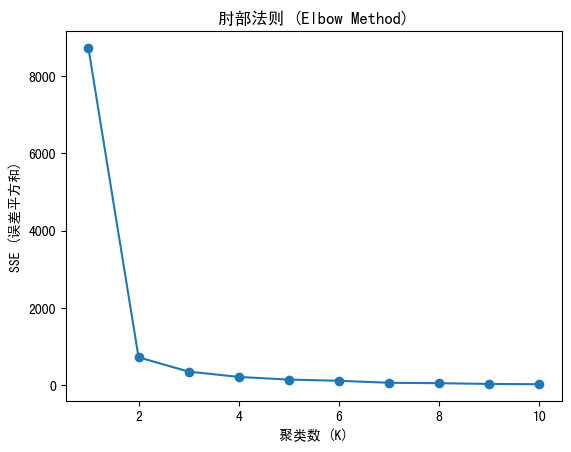

In [14]:
# 选择要进行聚类的特征
features = df[['券均优惠价格', '优惠比例', 'log_使用次数']]

# 使用肘部法则确定聚类数
inertia = []
for i in range(1, 11):  # 试试1到10个聚类
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# 绘制肘部法则图
plt.plot(range(1, 11), inertia, marker='o')
plt.title("肘部法则 (Elbow Method)")
plt.xlabel("聚类数 (K)")
plt.ylabel("SSE (误差平方和)")
plt.show()

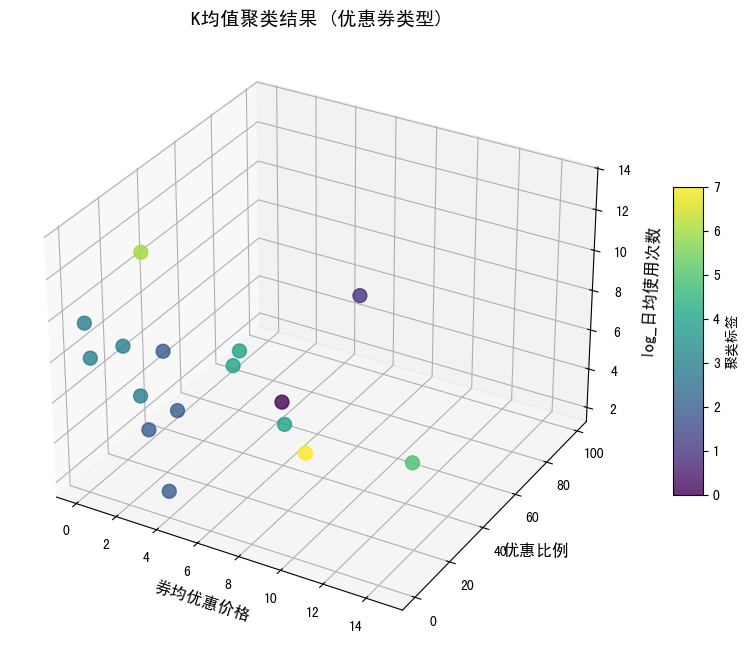

In [15]:


# 从肘部法则图选择聚类数，例如选择3个聚类
kmeans = KMeans(n_clusters=8, random_state=42)
df['聚类标签'] = kmeans.fit_predict(features)
# 设置画布
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
scatter = ax.scatter(df['券均优惠价格'], df['优惠比例'], df['log_使用次数'], 
                     c=df['聚类标签'], cmap='viridis', s=100, alpha=0.8)

# 添加颜色条
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("聚类标签")

# 设置坐标轴标签
ax.set_xlabel('券均优惠价格', fontsize=12)
ax.set_ylabel('优惠比例', fontsize=12)
ax.set_zlabel('log_日均使用次数', fontsize=12)
ax.set_title('K均值聚类结果 (优惠券类型)', fontsize=14)

# 显示图形
plt.show()

Coupon_tag =  df[['Coupon_type', '聚类标签']]

在使用 K均值聚类进行优惠券分类时，我们选择了三个特征来进行聚类：
1. **券均优惠价格**：每张优惠券的平均优惠价格。
2. **优惠比例**：优惠券的优惠金额与总金额的比例。
3. **日均使用次数**：每个优惠券类型的日均使用次数。

1. **聚类数的选择**（通过肘部法则）：
- **肘部法则**：我们通过肘部法则（Elbow Method）来确定聚类数。肘部法则的核心思想是，随着聚类数增多，误差平方和（SSE）会不断减小，但在某个聚类数后，误差的下降速度会放缓（形成“肘部”）。我们通常选择该“肘部”处的聚类数作为最佳聚类数。
  
  - **图示分析**：你绘制的肘部法则图展示了不同聚类数下的误差平方和（SSE）。通过查看图形的“肘部”位置，可以判断合适的聚类数。
  - 例如，如果肘部出现在 K=8，那么可以选择 K=8，意味着最佳的聚类数为 8。

  在你的代码中，你选择了 K=8，表示你想将优惠券分成 8 类。虽然在肘部法则中没有明显的“肘部”位置（可能是因为数据本身的分布），选择 K=8 可能是基于你的具体需求或对数据的先验理解。

2. **聚类依据**：
选择了三个特征：
- **券均优惠价格**：表明优惠券的平均优惠金额。如果该值较高，可能表示高价值的优惠券。
- **优惠比例**：描述了优惠券的优惠力度。高的优惠比例意味着该优惠券的折扣力度大，可能更吸引消费者。
- **日均使用次数**：反映了该优惠券的使用频率。频繁使用的优惠券可能受到广泛的接受和使用。

基于这三个特征，K均值算法将这些优惠券分为 8 类，每个类的优惠券在上述特征上具有相似性。

3. **聚类阈值的解释**：
K均值聚类通过计算每个数据点（在这里是每种优惠券）的距离，尝试将数据点分配到离其更近的聚类中心。因此，每个聚类的形成都有其特定的“阈值”：
- 每一类的优惠券在这三个特征上会有一些集中趋势。例如，某一类可能有较高的优惠比例和较低的券均优惠价格，表示这类优惠券的折扣力度大，但单张券的优惠金额较小，可能频繁使用。
- 另一类可能有较低的优惠比例，但券均优惠价格较高，且使用频率较低，这可能是一些高价值但较少使用的优惠券。

4. **如何理解每个聚类**：
一旦你得到了每个优惠券的聚类标签，就可以进一步分析每一类优惠券的特征：
- **类内特征分析**：每个聚类内的优惠券会在“券均优惠价格”、“优惠比例”和“日均使用次数”上有相似性。可以通过聚类后的均值、标准差等统计量来分析每一类的典型特征。
- **可视化**：通过散点图，你可以将不同聚类用不同颜色标示出来，从而直观地看到不同类型优惠券在这三个特征空间中的分布。

5. **进一步分析和决策**：
- 你可以根据聚类标签，对不同类型的优惠券进行不同的策略。例如：
  - **高优惠比例，高使用频率**：这种优惠券类型可能适合在促销活动中广泛发放，因为它们的使用频率较高，且优惠力度大，可能带来较高的吸引力。
  - **高券均优惠价格，低使用频率**：这种优惠券可能适合针对特定目标群体（如高价值客户）使用。
  
通过这些分析，你可以进一步优化营销策略，并根据不同类别的优惠券制定个性化的营销活动。

6. **总结**：
- 通过 K均值聚类，你已经将优惠券类型根据其优惠价格、优惠比例和日均使用次数进行了分类。
- 每个聚类的阈值是基于它们在这些特征上的集中程度而确定的，即相似的优惠券会被划分到同一类。
- 聚类结果的可视化帮助你更清晰地理解每个类别的特征，从而为营销决策提供支持。

###  选择2 阈值分类


####  分类依据(图)

**优惠券分类依据：小于25分位代表低优惠，大于25分位代表高优惠，其余是中优惠**

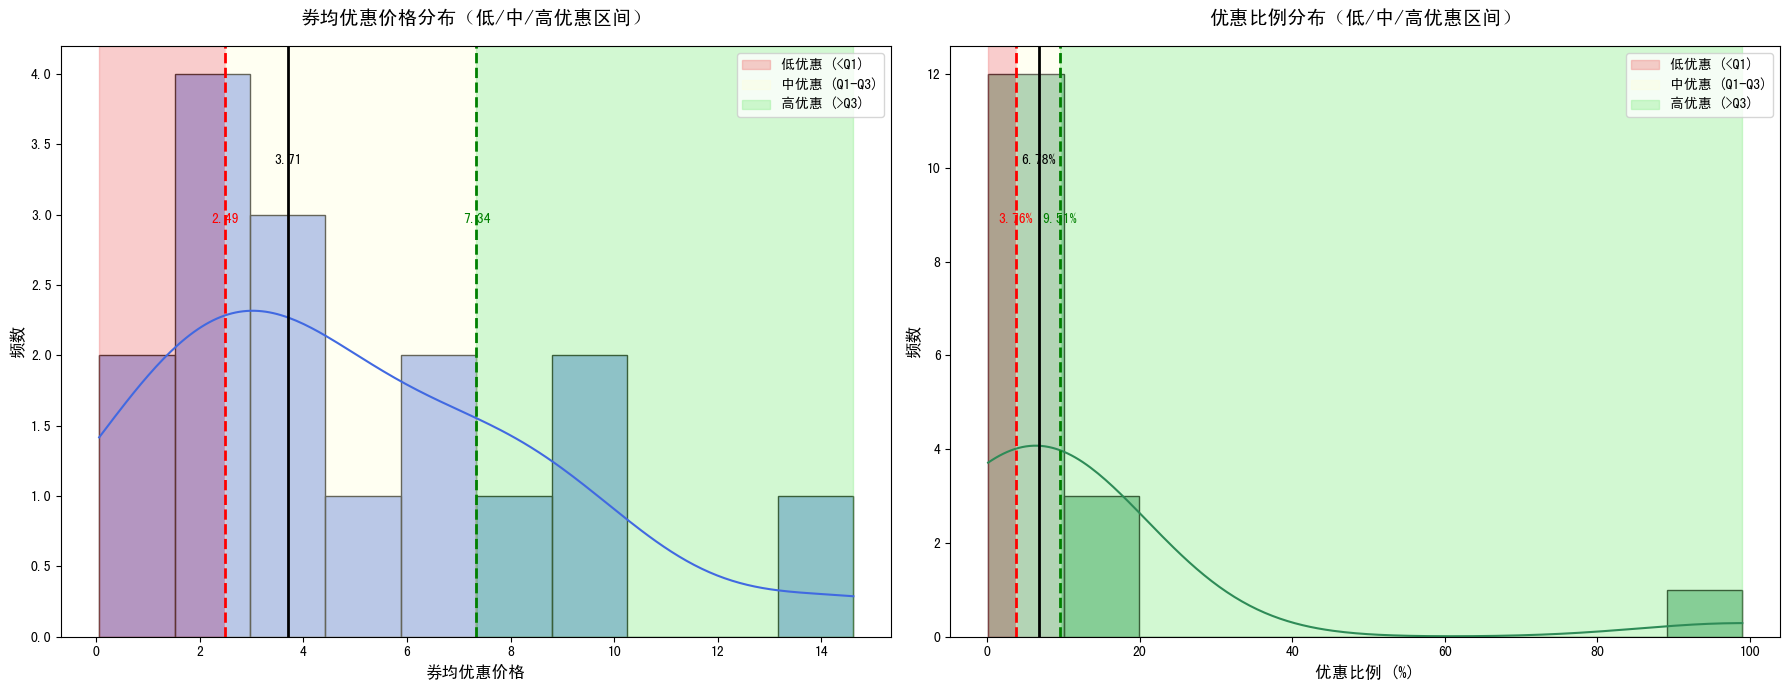

In [16]:
# 数据
coupon_price = np.array([2.548235, 9.018556, 8.927634, 1.846800, 4.858081, 2.624068, 8.189355, 3.557143, 7.060215, 3.017243,
                         3.861469, 2.305097, 0.245421, 6.548390, 0.059548, 14.618420])
discount_ratio = np.array([5.507586, 6.807134, 19.207342, 0.967979, 98.996517, 1.067113, 14.935559, 4.660565, 5.294371, 9.097849,
                           6.887507, 6.762217, 0.536493, 7.492750, 0.139007, 10.729673])

# 创建子图
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# ================== 券均优惠价格分布 ==================
sns.histplot(coupon_price, kde=True, ax=axes[0], color='royalblue', bins=10, alpha=0.6)
axes[0].set_title('券均优惠价格分布（低/中/高优惠区间）', fontsize=14, pad=15)
axes[0].set_xlabel('券均优惠价格', fontsize=12)
axes[0].set_ylabel('频数', fontsize=12)

# 计算四分位数
q1_cp, median_cp, q3_cp = np.percentile(coupon_price, [25, 50, 75])
min_cp, max_cp = min(coupon_price), max(coupon_price)

# 填充不同优惠区间
axes[0].axvspan(min_cp, q1_cp, color='lightcoral', alpha=0.4, label='低优惠 (<Q1)')
axes[0].axvspan(q1_cp, q3_cp, color='lightyellow', alpha=0.4, label='中优惠 (Q1-Q3)')
axes[0].axvspan(q3_cp, max_cp, color='lightgreen', alpha=0.4, label='高优惠 (>Q3)')

# 添加四分位线
for q, color, ls, pos in zip([q1_cp, median_cp, q3_cp], 
                            ['red', 'black', 'green'],
                            ['--', '-', '--'],
                            [0.7, 0.8, 0.7]):
    axes[0].axvline(q, color=color, linestyle=ls, linewidth=2)
    axes[0].text(q, axes[0].get_ylim()[1]*pos, f'{q:.2f}', 
                 color=color, ha='center', fontsize=10)

axes[0].legend(loc='upper right', fontsize=10)

# ================== 优惠比例分布 ==================
sns.histplot(discount_ratio, kde=True, ax=axes[1], color='seagreen', bins=10, alpha=0.6)
axes[1].set_title('优惠比例分布（低/中/高优惠区间）', fontsize=14, pad=15)
axes[1].set_xlabel('优惠比例 (%)', fontsize=12)
axes[1].set_ylabel('频数', fontsize=12)

# 计算四分位数
q1_dr, median_dr, q3_dr = np.percentile(discount_ratio, [25, 50, 75])
min_dr, max_dr = min(discount_ratio), max(discount_ratio)

# 填充不同优惠区间
axes[1].axvspan(min_dr, q1_dr, color='lightcoral', alpha=0.4, label='低优惠 (<Q1)')
axes[1].axvspan(q1_dr, q3_dr, color='lightyellow', alpha=0.4, label='中优惠 (Q1-Q3)')
axes[1].axvspan(q3_dr, max_dr, color='lightgreen', alpha=0.4, label='高优惠 (>Q3)')

# 添加四分位线
for q, color, ls, pos in zip([q1_dr, median_dr, q3_dr], 
                            ['red', 'black', 'green'],
                            ['--', '-', '--'],
                            [0.7, 0.8, 0.7]):
    axes[1].axvline(q, color=color, linestyle=ls, linewidth=2)
    axes[1].text(q, axes[1].get_ylim()[1]*pos, f'{q:.2f}%', 
                 color=color, ha='center', fontsize=10)

axes[1].legend(loc='upper right', fontsize=10)

# 优化图表布局
plt.tight_layout()
plt.show()


In [17]:
# 创建示例数据
data = {
    "Coupon_type": [20013.0, 20011.0, 9.0, 4.0, 10015.0, 0.0, 5.0, 11.0, 3.0, 2.0, 10.0, 1.0, 20014.0, 10010.0, 6.0, 10012.0],
    "券均优惠价格": [2.548235, 9.018556, 8.927634, 1.846800, 4.858081, 2.624068, 8.189355, 3.557143, 7.060215, 3.017243, 3.861469, 2.305097, 0.245421, 6.548390, 0.059548, 14.618420],
    "优惠比例": [5.507586, 6.807134, 19.207342, 0.967979, 98.996517, 1.067113, 14.935559, 4.660565, 5.294371, 9.097849, 6.887507, 6.762217, 0.536493, 7.492750, 0.139007, 10.729673]
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 按券均优惠价格分类
def categorize_by_coupon_price(row):
    if row['券均优惠价格'] > 7.34:
        return '高价优惠券'
    elif row['券均优惠价格'] < 2.49:
        return '低价优惠券'    
    else:
        return '中等优惠券'
    
# 按优惠比例分类
def categorize_by_discount_ratio(row):
    if row['优惠比例'] > 9.51:
        return '高比例优惠'
    elif row['优惠比例'] < 3.76:
        return '低比例优惠'
    else:
        return '中比例优惠'



# 创建分类列
df['优惠比例分类'] = df.apply(categorize_by_discount_ratio, axis=1)
df['券均优惠价格分类'] = df.apply(categorize_by_coupon_price, axis=1)

# 输出分类后的数据
df[['Coupon_type', '券均优惠价格', '优惠比例', '优惠比例分类', '券均优惠价格分类']]
df['优惠券类别'] = df.apply(lambda x: x['优惠比例分类'] + x['券均优惠价格分类'], axis=1)
df['商品平均价格'] = df.apply(lambda x: x['券均优惠价格'] * 100 / x['优惠比例'] , axis=1)

# order_detail = pd.merge(order_detail, df[['Coupon_type', '优惠券类别']], on='Coupon_type', how='left')

In [18]:
order_detail = pd.merge(order_detail, df[['Coupon_type', '优惠券类别']], on='Coupon_type', how='left')

In [19]:
print(matplotlib.matplotlib_fname())  # 显示 Matplotlib 配置文件路径
print(matplotlib.get_cachedir()) 

!cp /Users/liangkaixin/Documents/优惠券投放提效分析/SimHei.ttf /Users/liangkaixin/Documents/Notes/商业分析/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf

def query(sql):
    return duckdb.sql(sql)
def query_df(sql):
    return query(sql).df()
        

# **1. 指定字体文件路径**（修改为你的实际路径）
font_path = "/Users/liangkaixin/Documents/优惠券投放提效分析/SimHei.ttf"  # 例如放在项目的 fonts 目录下

# **2. 加载字体**
my_font = fm.FontProperties(fname=font_path)

# **3. 设置 Matplotlib 使用该字体**
plt.rcParams["font.family"] = my_font.get_name()
plt.rcParams["axes.unicode_minus"] = False  # 解决负号 '-' 显示问题

# 指定一个支持中文的字体 (如 SimHei)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或 'Microsoft YaHei', 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

pd.set_option('display.float_format', '{:.10f}'.format)

/Users/liangkaixin/Documents/Notes/商业分析/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc
/Users/liangkaixin/.matplotlib


## 实际优惠金额与实付金额对比

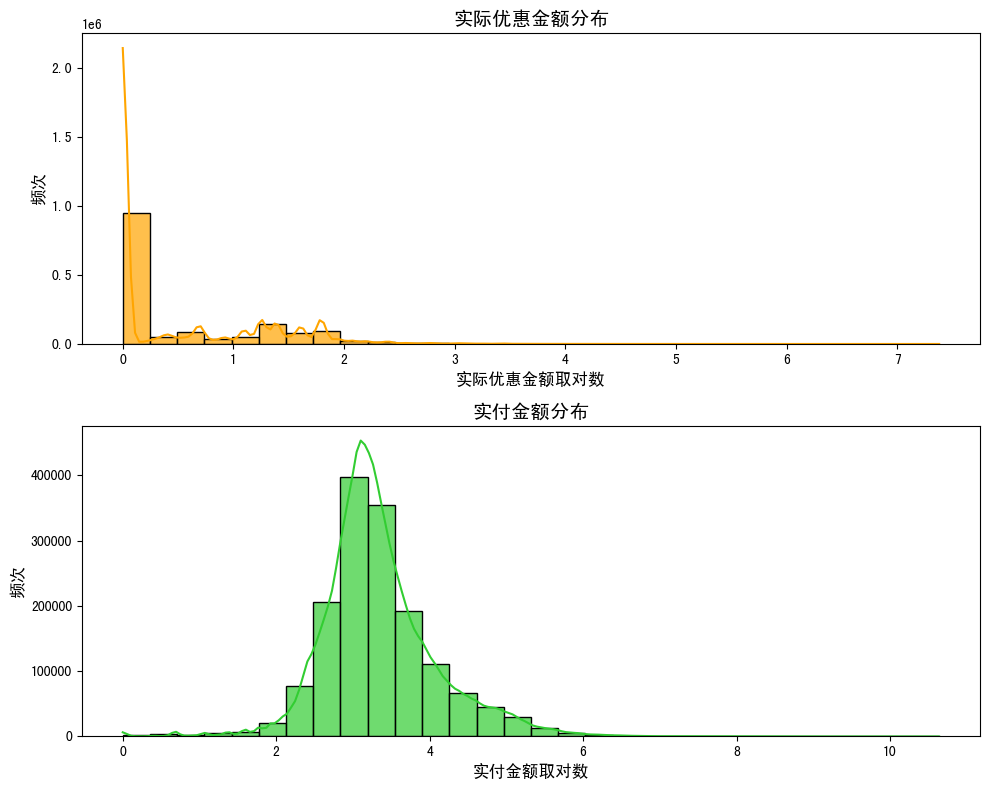

In [20]:
# 设置画布大小
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 指定一个支持中文的字体 (如 SimHei)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或 'Microsoft YaHei', 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 直方图 1: 实际优惠金额
sns.histplot(np.log1p(order_detail['Reduce_amount']), bins=30, kde=True, 
             color='#FFA500', alpha=0.7, ax=axes[0])
axes[0].set_title('实际优惠金额分布', fontsize=14)
axes[0].set_xlabel('实际优惠金额取对数', fontsize=12)
axes[0].set_ylabel('频次', fontsize=12)

# 直方图 2: 实付金额
sns.histplot(np.log1p(order_detail['Actual_pay']), bins=30, kde=True, 
             color='#32CD32', alpha=0.7, ax=axes[1])
axes[1].set_title('实付金额分布', fontsize=14)
axes[1].set_xlabel('实付金额取对数', fontsize=12)
axes[1].set_ylabel('频次', fontsize=12)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


## 趋势分析

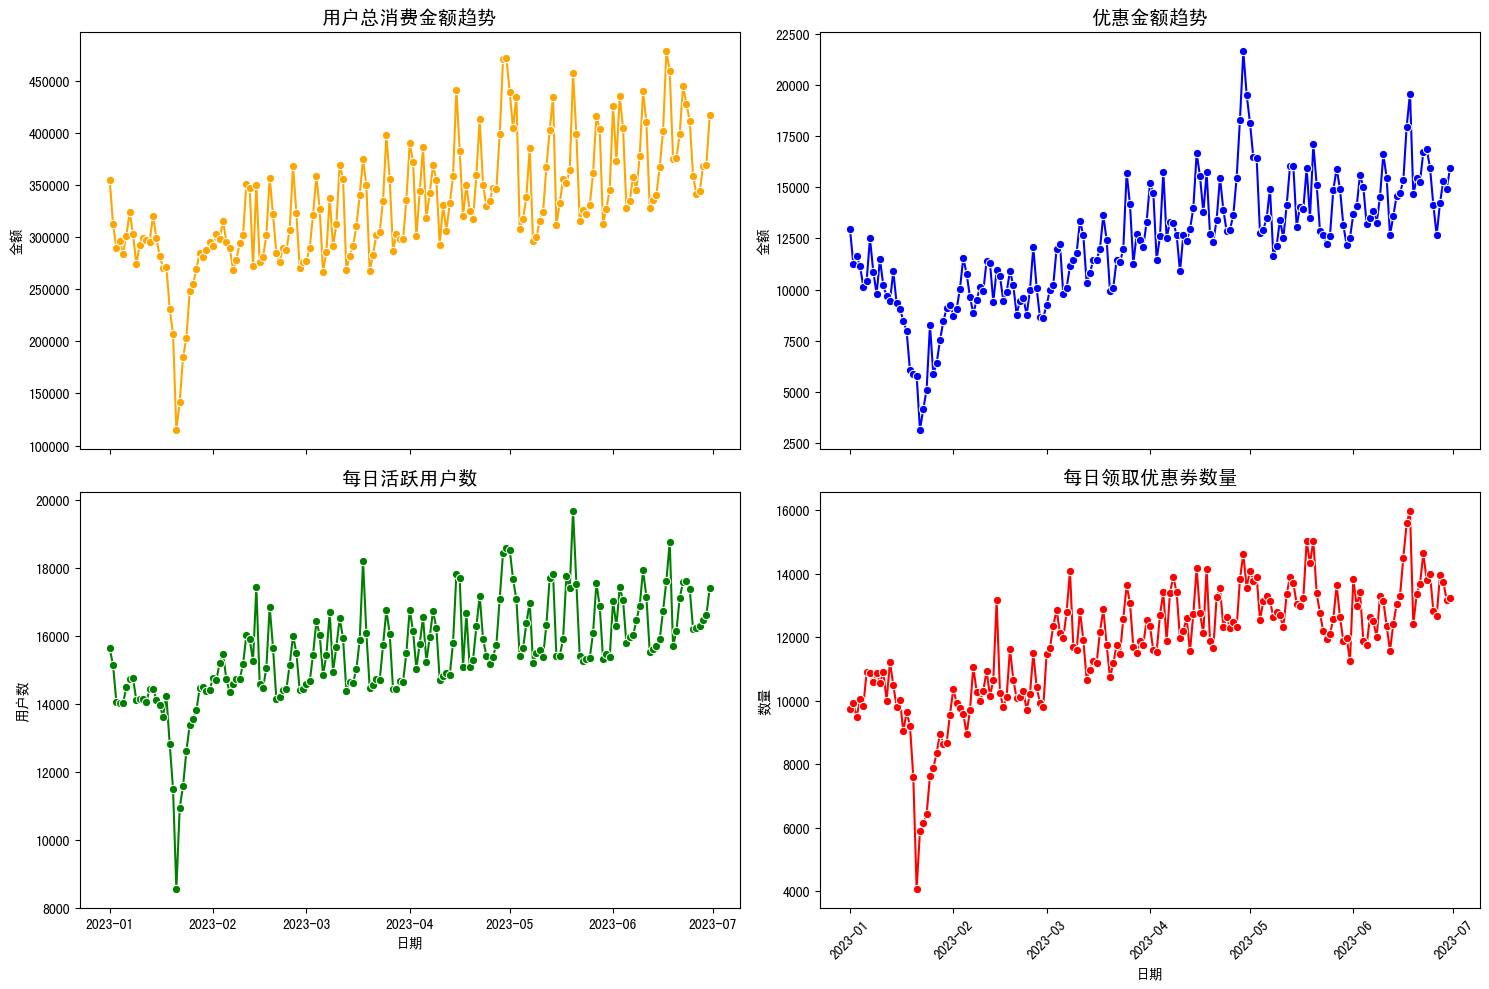

In [21]:
# Assume data is already loaded into order_detail, user_visit_detail, and user_coupon_receive

order_detail['Pay_date'] = pd.to_datetime(order_detail['Pay_date'])
# Calculate total daily payment and reduce amount
daily_payment = order_detail.groupby(order_detail['Pay_date'].dt.date)[['Actual_pay', 'Reduce_amount']].sum().reset_index()

# Calculate daily active users (unique user count per day)
user_visit_detail['Visit_date'] = pd.to_datetime(user_visit_detail['Visit_date'])
daily_active_users = user_visit_detail.groupby(user_visit_detail['Visit_date'].dt.date)['User_id'].nunique().reset_index()
daily_active_users.columns = ['Visit_date', 'Active_users']

# Assuming user_coupon_receive already contains 'Receive_date'
user_coupon_receive['Receive_date'] = pd.to_datetime(user_coupon_receive['Receive_date'])

# Calculate daily coupon receipt count
daily_coupon_received = user_coupon_receive.groupby(user_coupon_receive['Receive_date'].dt.date)['Coupon_id'].count().reset_index()
daily_coupon_received.columns = ['Receive_date', 'Coupon_received_count']


# 创建画布，分为 2 行 2 列
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

# 绘制用户总消费金额趋势
sns.lineplot(x=daily_payment['Pay_date'], y=daily_payment['Actual_pay'], 
             marker="o", color="orange", ax=axes[0, 0])
axes[0, 0].set_title("用户总消费金额趋势", fontsize=14)
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("金额")

# 绘制优惠金额趋势
sns.lineplot(x=daily_payment['Pay_date'], y=daily_payment['Reduce_amount'], 
             marker="o", color="blue", ax=axes[0, 1])
axes[0, 1].set_title("优惠金额趋势", fontsize=14)
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("金额")

# 绘制每日活跃用户数趋势
sns.lineplot(x=daily_active_users['Visit_date'], y=daily_active_users['Active_users'], 
             marker="o", color="green", ax=axes[1, 0])
axes[1, 0].set_title("每日活跃用户数", fontsize=14)
axes[1, 0].set_xlabel("日期")
axes[1, 0].set_ylabel("用户数")

# 绘制每日领取优惠券数量趋势
sns.lineplot(x=daily_coupon_received['Receive_date'], y=daily_coupon_received['Coupon_received_count'], 
             marker="o", color="red", ax=axes[1, 1])
axes[1, 1].set_title("每日领取优惠券数量", fontsize=14)
axes[1, 1].set_xlabel("日期")
axes[1, 1].set_ylabel("数量")

# 调整布局，防止标签重叠
plt.xticks(rotation=45)
plt.tight_layout()

# 显示图表
plt.show()

## 人均使用优惠券次数

人均使用优惠券次数: 44.70


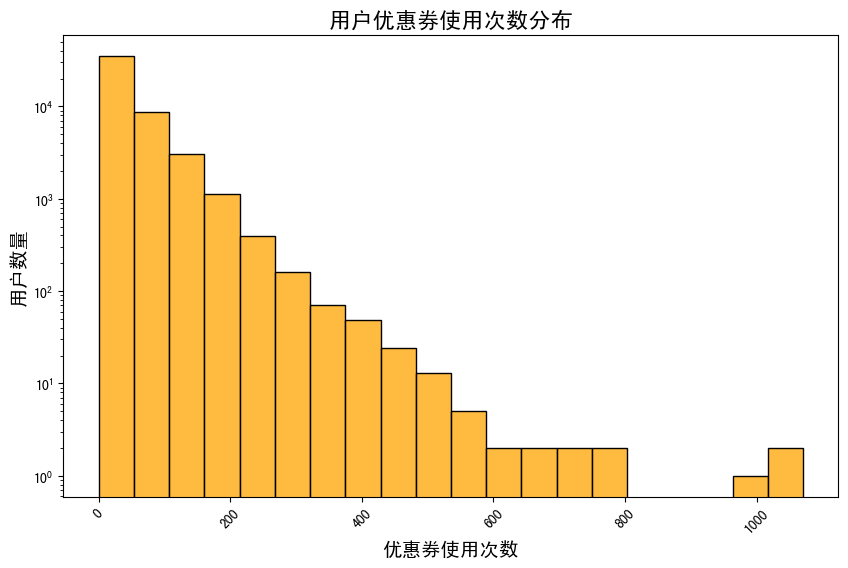

In [22]:


# 先将日期列转换为日期类型
user_coupon_receive['Receive_date'] = pd.to_datetime(user_coupon_receive['Receive_date'])

# 计算每个用户使用优惠券的次数
user_coupon_count = user_coupon_receive.groupby('User_id')['Coupon_id'].nunique().reset_index()
user_coupon_count.columns = ['User_id', 'Coupon_count']

# 计算人均使用优惠券次数
average_coupon_usage = user_coupon_count['Coupon_count'].mean()
print(f"人均使用优惠券次数: {average_coupon_usage:.2f}")

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制直方图（柱状图）
sns.histplot(user_coupon_count['Coupon_count'], bins=20, color='orange', kde=False)

# 设置标题和坐标轴标签
plt.title("用户优惠券使用次数分布", fontsize=16)
plt.xlabel("优惠券使用次数", fontsize=14)
plt.ylabel("用户数量", fontsize=14)
plt.yscale("log")  # 设置 y 轴为对数刻度
plt.xticks(rotation=45)  # 旋转 x 轴标签防止重叠

# 显示图表
plt.show()

## 领券总数分布

In [23]:
df = query_df("""
    select count(*) as 领券总数,User_id AS 用户ID, Receive_date from user_coupon_receive
           WHERE Coupon_id IS NOT NULL AND Receive_date IS NOT NULL
           group by 2, 3
      """)
# 计算每个值的频次及其占比
value_counts = df['领券总数'].value_counts(normalize=True)

# 将结果转换为 DataFrame，展示频次和占比
result_df = pd.DataFrame({
    '领券总数': value_counts.index,
    '人数': df['领券总数'].value_counts(),
    '占比(%)': value_counts*100
})
# 显示结果
result_df = result_df[result_df['占比(%)'] > 0.5]

custom_colors = ['#FFD500', '#ffc000', '#ffab00', '#ff9500', '#ff8000', '#ff6b00']

# 创建一个 '占比(%)' 小于某个阈值的布尔标志
result_df['explode'] = result_df['占比(%)'] < 5

# 使用 plotly 创建交互式饼图
fig = px.pie(
    result_df,
    values='占比(%)',
    names='领券总数',
    title='领券总数分布的饼图',
    color_discrete_sequence=custom_colors,
    hole=0.3  # 如果你想制作甜甜圈图
)

# 添加爆开效果，使用饼图角度细微调整大的小爆开效果
fig.update_traces(
    pull=result_df['explode'].astype(float) * 0.1
)

fig.show()

# 漏斗模型


## 分析目的

使用**漏斗模型**对用户进行分析，对各环节用户转化率的情况进行收集对比，

从中发现问题并对问题发生的原因进行分析，然后尝试给出业务建议。

继而利用**RFM模型**进行用户价值分析，力图对用户进行更高效的精细化运营，促进优惠券核销以及销售增长。

In [24]:
sql = """
-- 所有用户
with t1 as 
(
    select
         count(distinct User_id) as all_users
     from 
     (
      select User_id from order_detail
      union all
      select User_id from user_visit_detail
      union all
      select User_id from user_coupon_receive
     )
),
-- 领券用户
t2 as(
select
    count(distinct User_id) as getcoupons_users
from user_coupon_receive
where Coupon_id is not null
),
-- 首次用券核销用户
a1 as(
select
    User_id,
    min(Pay_date) as first_date
from order_detail
where Coupon_id is not null
group by User_id),
-- 用券后复购用户
a2 as(
select
    count(distinct User_id) as second_user
from a1
inner join 
(
    select * from order_detail
    where Coupon_id is not null
) as order_detail
using(User_id)
where order_detail.Pay_date	>first_date
)

select
    (select all_users from t1) as 所有用户数,
    (select getcoupons_users from t2) as 领券用户数,
    (select count(distinct User_id) from a1) as 首次用券核销用户数,
    (select second_user from a2) as 用券后复购用户数
--where Date_received is not null and Date is not null;
"""

df = query_df(sql)

In [25]:
# 转换数据格式（重命名列）
df = df.T.reset_index()
df.columns = ["stage", "number"]
df

,stage,number
0,所有用户数,49965
1,领券用户数,48760
2,首次用券核销用户数,34821
3,用券后复购用户数,25924


## 用户转化分析

In [26]:
# 计算相对初始值的百分比
df["percent_initial"] = df["number"] / df["number"].max()

# 创建漏斗图
fig = go.Figure(go.Funnel(
    x=df["number"],  
    y=df["stage"],  
    textinfo="value+percent initial",  # 显示数值 + 相对初始值的百分比
    textposition="inside",  # 文本居中
    marker = {        "color": ['#FFD500', '#ffc000', '#ffab00', '#ff9500', '#ff8000'],  # 使用自定义的色号
        "line": {
            "width": [4, 2, 2, 3, 1],  # 每个部分的边框宽度
            "color": ['wheat', 'wheat', 'blue', 'wheat', 'wheat']  # 边框颜色
        }
        
        },
    opacity=0.65,  # 透明度
    connector=dict(
        line=dict(color="royalblue", dash="dot", width=3)  # 连接线样式
    )
))

# 设置标题和整体样式
fig.update_layout(
    title=dict(text="📊 用户转化漏斗图", font=dict(size=22, family="Arial", color="darkblue")),
    plot_bgcolor="white",  # 背景色
    font=dict(size=14, family="Arial"),
    margin=dict(l=100, r=100, t=80, b=50)  # 调整边距
)

# 显示图表
fig.show()



从上述漏斗模型中我主要发现三个现象：

第一：用户领券转化率约为98%，数据表现非常好

第二：用户核销转化率为70%，效果比较理想

第三：用户领券后复购转化率为52%，还有提升空间

## 用户复购转化率分析

对于第三个现象，用券核销用户复购转化率达到52%，该部分是**用户留存**的重要环节

为了体现优惠券对用户复购的影响，统计未领券核销优惠券的用户：

在该部分用户中仅有约31%的用户会复购，因此一定程度上可以说明优惠券对用户复购的促进作用

In [27]:
sql = """
-- 用券核销用户
with a1 as(
select
    User_id,
    Pay_date::Date as first_date
from order_detail
where Coupon_id is not null and Pay_date is not null
),
-- 用券后复购用户
a2 as(
select
    User_id,
    first_date,
    min(Pay_date),
    min(datediff('day', first_date::Date, Pay_date::Date)) as inter
from a1
inner join order_detail using(User_id)
where order_detail.Pay_date::Date>first_date::Date
group by User_id, first_date),
a3 as(
select 
	inter,
	count(*) as r
from a2
group by inter)

"""

rebuy = """
select 
	inter as '复购周期',
	r as '复购用户数',
  sum(r/(select sum(r) from a3)) over(order by inter) as '合计百分比'
from a3"""

avg_rebuy = """
select avg(inter) as '平均复购周期'
from a2
"""

display(query_df(f'{sql} {avg_rebuy}'))

display(query_df(f'{sql} {rebuy}').head(20))


,平均复购周期
0,5.2528839763


,复购周期,复购用户数,合计百分比
0,1,188198,0.4283808761
1,2,70697,0.5893031111
2,3,39880,0.6800789395
3,4,26304,0.7399527456
4,5,18296,0.7815985469
5,6,14738,0.8151455418
6,7,11935,0.8423122798
7,8,8208,0.8609955295
8,9,6251,0.8752242081
9,10,5339,0.8873769701


短复购周期（较短的复购间隔）
优点：

高活跃度：客户频繁购买，说明他们对你的产品或服务有较强的需求或喜好。

现金流较好：短期内的频繁购买有助于保持稳定的收入流。

客户粘性强：说名客户愿意频繁购买

缺点：

疲劳效应：过于频繁的购买可能导致消费者感到疲劳或厌倦，尤其是产品或服务不适合长期使用。

市场竞争激烈：短周期复购可能说明你的竞争对手在不断刺激客户，促销活动频繁，这可能反映出市场的竞争压力较大。

In [28]:
(order_detail['Actual_pay'] + order_detail['Reduce_amount']).describe()

count   1543536.0000000000
mean         40.3549852680
std          72.6524987375
min           0.0000000000
25%          18.5000000000
50%          25.4000000000
75%          39.5000000000
max       41860.0000000000
dtype: float64

In [29]:
tmp = query_df("""
SELECT 
    Coupon_type::INT AS 优惠券类型, 
    AVG(Actual_pay) AS 用户平均实付, 
    AVG(Reduce_amount) AS 平均优惠金额, 
    AVG(Actual_pay + Reduce_amount)::INT AS 商品平均价格,
    COUNT(*)::INT AS 订单数
    
FROM order_detail
WHERE Coupon_type IS NOT NULL
GROUP BY Coupon_type
ORDER BY 订单数 DESC
""")
tmp

,优惠券类型,用户平均实付,平均优惠金额,商品平均价格,订单数
0,1,31.7827865711,2.3050967231,34,570443
1,3,126.2930059075,7.0602147385,133,23191
2,6,42.7784862553,0.0595479536,43,16370
3,4,188.9423782772,1.8468000936,191,8544
4,10010,80.8479574571,6.5483901378,87,8274
5,2,30.1471179125,3.0172434766,33,5097
6,20014,45.4999671269,0.2454207758,46,3042
7,5,46.6419047619,8.1893552995,55,1302
8,20011,123.4682704692,9.0185556578,132,1087
9,0,243.2794994675,2.6240681576,246,939


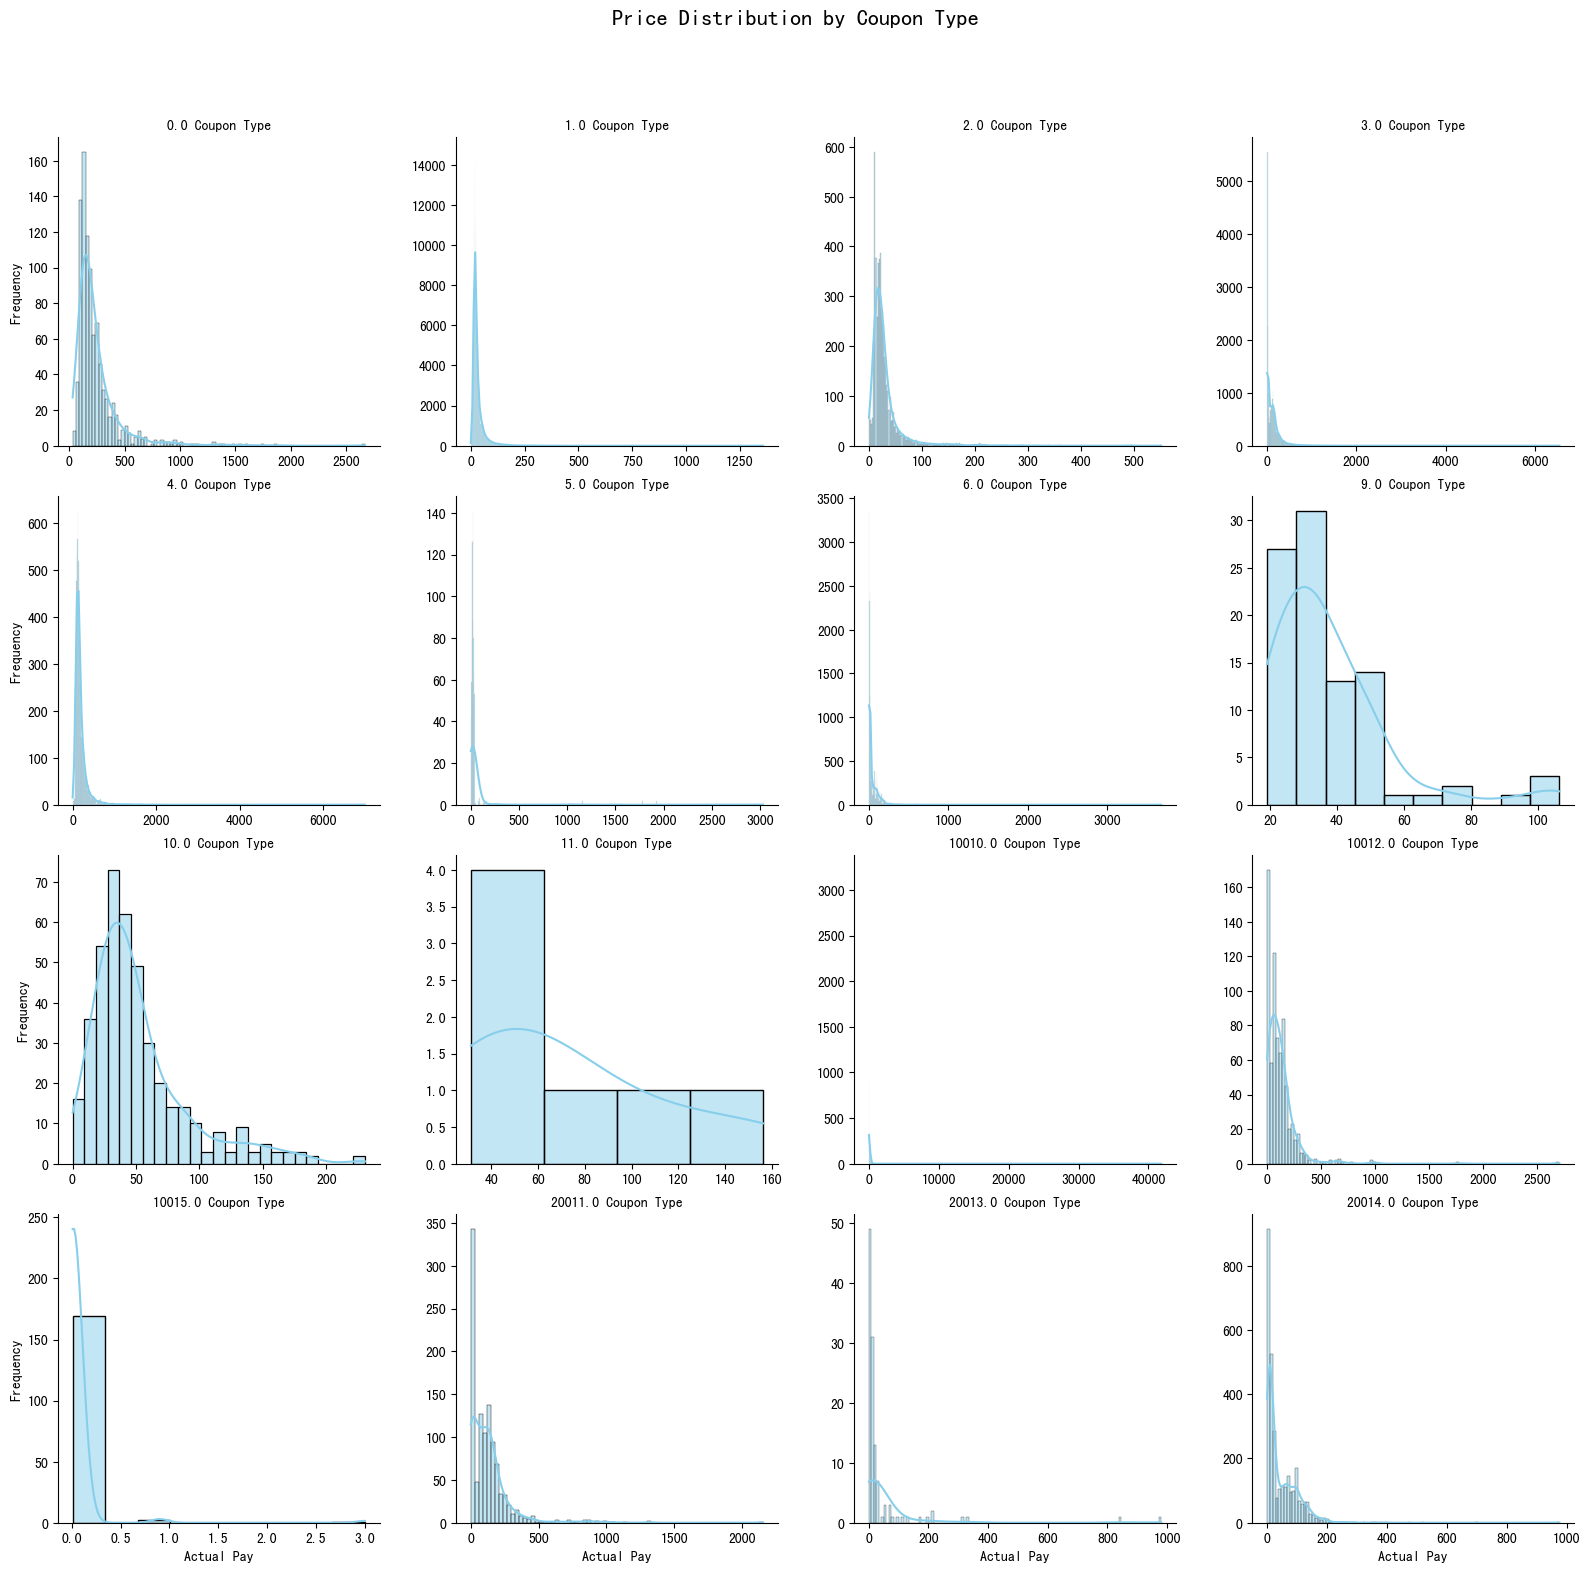

In [30]:


# 创建 FacetGrid，根据 Coupon_type 进行分面绘图
g = sns.FacetGrid(order_detail, col="Coupon_type", col_wrap=4, height=4, sharex=False, sharey=False)

# 绘制直方图，自动分箱
g.map(sns.histplot, "Actual_pay", kde=True, color="skyblue", bins="auto")

# 设置标题和标签
g.set_axis_labels("Actual Pay", "Frequency")
g.set_titles("{col_name} Coupon Type")  # 每个子图动态标题

# 设置整体标题
plt.subplots_adjust(top=0.9)  # 调整子图之间的间隙
g.fig.suptitle("Price Distribution by Coupon Type", fontsize=16)

# 显示图表
plt.show()


大概可以通过消费券类型区分出用户群体？

## 通过复购率对优惠券分析

In [31]:
sql = """
with a1 as(
select
    User_id,
    Coupon_type,
    Pay_date as first_date
from order_detail
where Coupon_id is not null
qualify row_number()over(partition by User_id order by Pay_date asc) = 1
),
-- 用券后复购用户
a2 as(
select
    a1.*exclude(Coupon_type),
    a1.Coupon_type as Coupon_type,
    if(order_detail.User_id is not null, 1, 0) AS 是否复购
from a1
left join 
(
    select * from order_detail
    where Coupon_id is not null
) as order_detail
on a1.User_id = order_detail.User_id and order_detail.Pay_date	> first_date
)
select sum(是否复购) * 100 / count(*) as 复购率, count(*) as 使用次数, Coupon_type from a2
group by 3
order by 2 desc
"""

display(query_df(f'{sql}'))



,复购率,使用次数,Coupon_type
0,99.0586960818,546476,1.0000000000
1,92.0333649668,20021,3.0000000000
2,95.9482521332,18165,6.0000000000
3,96.1189663579,10255,4.0000000000
4,87.0319634703,4380,10010.0000000000
5,98.1132075472,2756,2.0000000000
6,99.5024875622,1206,5.0000000000
7,94.5825932504,1126,0.0000000000
8,82.7225130890,764,20014.0000000000
9,97.2752043597,734,10012.0000000000


## 通过使用速度分层

In [32]:
order_detail_Coupon_info = query_df(
"""
SELECT 
       *,
       LEAST(2, (Pay_date::DATE-GREATEST(Start_date::DATE, Receive_date::DATE))/(End_date::DATE-Pay_date::DATE)) AS speed,
       case 
       when speed <= 1 or speed = 'NAN' then -1
       when speed > 1 then 1
       end AS Frequency_consumption
FROM order_detail
JOIN user_coupon_receive USING(User_id, Coupon_id)
"""
)

In [33]:
sql = """
-- 用券核销用户
with a1 as(
select
    User_id,
    Pay_date::Date as first_date
from order_detail_Coupon_info
where Coupon_id is not null and Pay_date is not null
),
-- 用券后复购用户
a2 as(
select
    User_id,
    first_date,
    max(Frequency_consumption) as Frequency_consumption,
    min(Pay_date),
    min(datediff('day', first_date::Date, Pay_date::Date)) as inter
from a1
inner join order_detail_Coupon_info using(User_id)
where order_detail_Coupon_info.Pay_date::Date>first_date::Date
group by User_id, first_date),
a3 as(
select 
	inter,
    Frequency_consumption,
	count(*) as r
from a2
group by inter,Frequency_consumption)

"""

rebuy = """
select
    Frequency_consumption,
	inter as '复购周期',
	r as '复购用户数',
  sum(r/(select sum(r) from a3)) over(order by inter) as '合计百分比'
from a3
"""

avg_rebuy = """
select Frequency_consumption, avg(inter) as '平均复购周期'
from a2
group by 1
"""

display(query_df(f'{sql} {avg_rebuy}'))

display(query_df(f'{sql} {rebuy}').head(20))


,Frequency_consumption,平均复购周期
0,1,13.6966538018
1,-1,21.1903424190


,Frequency_consumption,复购周期,复购用户数,合计百分比
0,1,1,6763,0.1218802214
1,-1,1,2574,0.1218802214
2,1,2,5053,0.2139332707
3,-1,2,1999,0.2139332707
4,1,3,4106,0.2882205514
5,-1,3,1585,0.2882205514
6,1,4,3245,0.3481359649
7,-1,4,1345,0.3481359649
8,1,5,2789,0.3996188388
9,-1,5,1155,0.3996188388


In [34]:
query_df(f'{sql} {rebuy}').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Frequency_consumption  339 non-null    int32  
 1   复购周期                   339 non-null    int64  
 2   复购用户数                  339 non-null    int64  
 3   合计百分比                  339 non-null    float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 9.4 KB


<Axes: xlabel='复购周期', ylabel='复购用户数'>

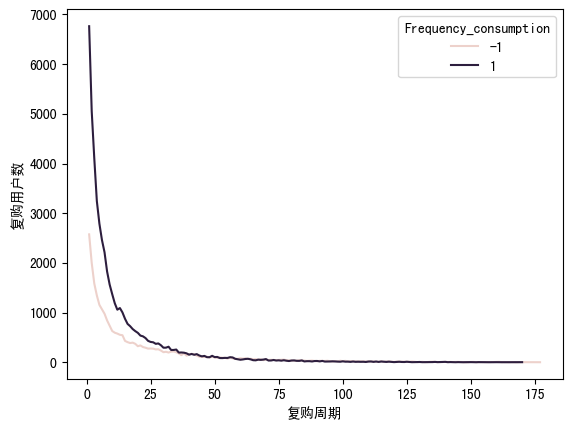

In [35]:
sns.lineplot(data = query_df(f'{sql} {rebuy}'), x = '复购周期', y = '复购用户数', hue = 'Frequency_consumption')

# RFM用户价值分析

通过RFM的这三个指标来建立xyz轴，用这三个维度来划分不同的用户，针对不同分类的用户来进行更加精细的运营，重新定义RFM，具体如下：

R：指用户最近一次购买离表中最近日期的距离

F：指用户购买次数进行指代

M：指用户用券后实际消费金额，例如200:20的优惠券，M = 200-20

In [36]:
# R：最近用券消费消费时间
# F：用券消费频率
# M：用券实际消费金额
sql = """
SELECT
		User_id as '用户ID',
		DATEDIFF('day', max(Pay_date)::Date, '2023-06-30'::Date) as R,
		count(*) as F,
		round(avg(Actual_pay),2) as M 
FROM order_detail
group by User_id """
RFM = query_df(sql)
RFM

,用户ID,R,F,M
0,44782be9c360d5f806d1d60faa3f0b3a,2,125,34.3600000000
1,495066eb5297c98d87368b9f7b3ccfb5,0,132,18.6600000000
2,74cdfb1ef06e8c31831df411887b7293,0,633,56.5000000000
3,5e5d960aff5d0254eff1dd6ca05613fb,1,156,32.2500000000
4,5e44f2eb9b56827200dcfca21040ea8c,0,41,71.7500000000
...,...,...,...,...
47203,6a264405a916a4a95698ab78d34a19f2,13,1,14.9000000000
47204,c8dcf989f71da0085a188d5ecca9a5a2,86,1,69.9000000000
47205,b8b96d2d86577d2a9624114525df6be5,151,1,26.8000000000
47206,adbd4f9aec407eff36bccf77b5ad9e07,44,1,241.0000000000


In [37]:
RFM.describe()

,R,F,M
count,47208.0000000000,47208.0000000000,47208.0000000000
mean,36.2260210134,32.6964921200,51.3548080834
std,45.5094999753,58.0147054336,69.9930663422
min,0.0000000000,1.0000000000,0.0000000000
25%,3.0000000000,3.0000000000,22.9000000000
50%,15.0000000000,10.0000000000,34.1100000000
75%,55.0000000000,37.0000000000,56.7025000000
max,180.0000000000,942.0000000000,3680.0000000000


25%的人在5天内有过消费

## 1️⃣ RFM 数据分布：直方图

目的：观察 R、F、M 的分布情况，识别偏态、离群点。

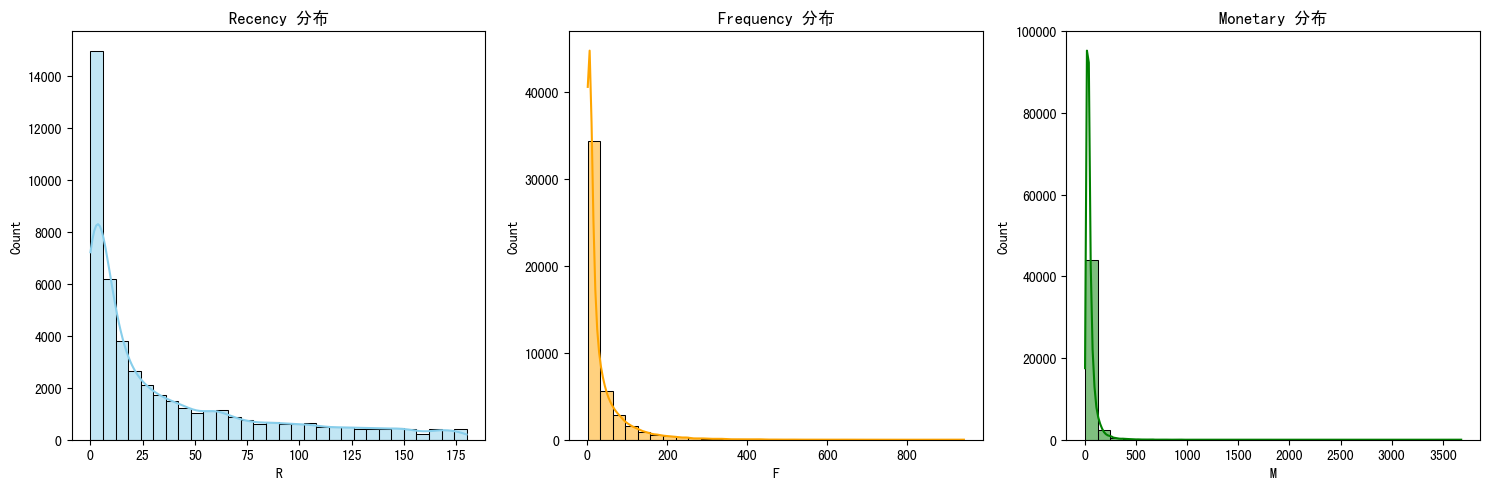

In [38]:
# 设置画布
plt.figure(figsize=(15, 5))

# 直方图绘制 RFM 三个指标的分布
plt.subplot(1, 3, 1)
sns.histplot(RFM['R'], bins=30, kde=True, color='skyblue')
plt.title('Recency 分布')

plt.subplot(1, 3, 2)
sns.histplot(RFM['F'], bins=30, kde=True, color='orange')
plt.title('Frequency 分布')

plt.subplot(1, 3, 3)
sns.histplot(RFM['M'], bins=30, kde=True, color='green')
plt.title('Monetary 分布')

plt.tight_layout()
plt.show()

## 2️⃣ RFM 三变量关系：散点图
目的：观察 R、F、M 三者之间的关系，比如消费次数和消费金额的相关性。

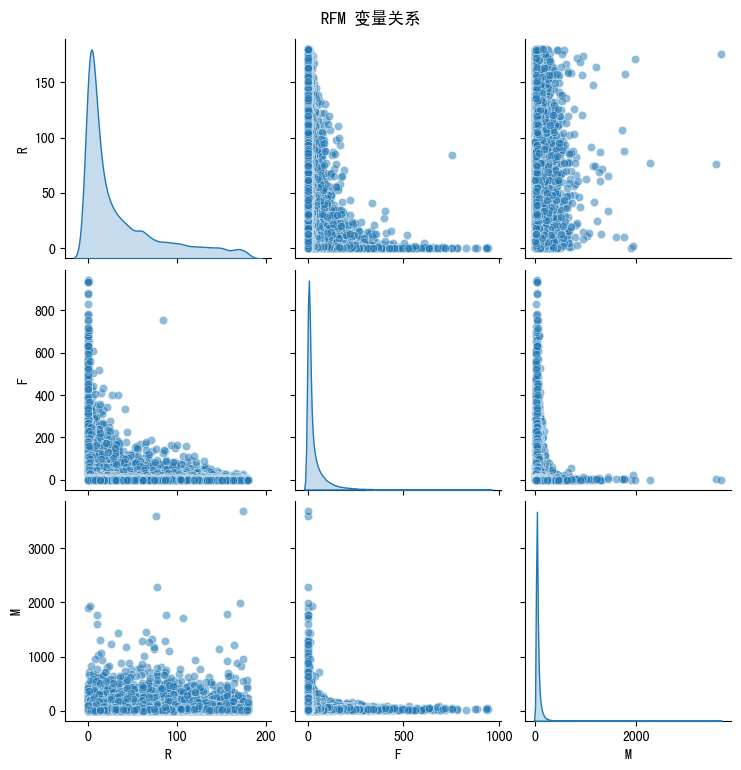

In [39]:
sns.pairplot(RFM, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("RFM 变量关系", y=1.02)
plt.show()

## 3️⃣ RFM 分群：K-Means 聚类

目的：将用户按 RFM 评分分成不同群体，观察高价值用户、低价值用户的分布情况。

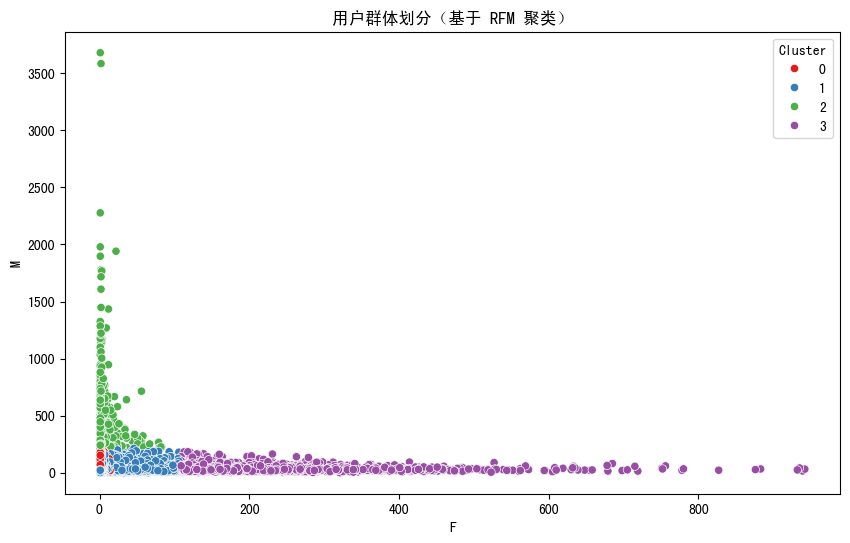

In [40]:


# 数据标准化
scaler = StandardScaler()
RFM_scaled = scaler.fit_transform(RFM[['R', 'F', 'M']])

# K-Means 聚类
kmeans = KMeans(n_clusters=4, random_state=42)
RFM['Cluster'] = kmeans.fit_predict(RFM_scaled)

# 可视化不同群体的分布
plt.figure(figsize=(10, 6))
sns.scatterplot(data=RFM, x='F', y='M', hue='Cluster', palette='Set1')
plt.title('用户群体划分（基于 RFM 聚类）')
plt.show()


📌 解释：

使用 KMeans 进行聚类，分成 4 个用户群体。

通过 scatterplot() 观察 购买频次（F）和消费金额（M） 的聚类情况。

## 4️⃣ 各群体的 RFM 指标箱线图
目的：比较不同用户群体的 RFM 指标分布，找出高价值用户与低价值用户的差异。

📌 解释：

boxplot() 可以看出不同群体的 RFM 值分布，发现异常值或极端用户。

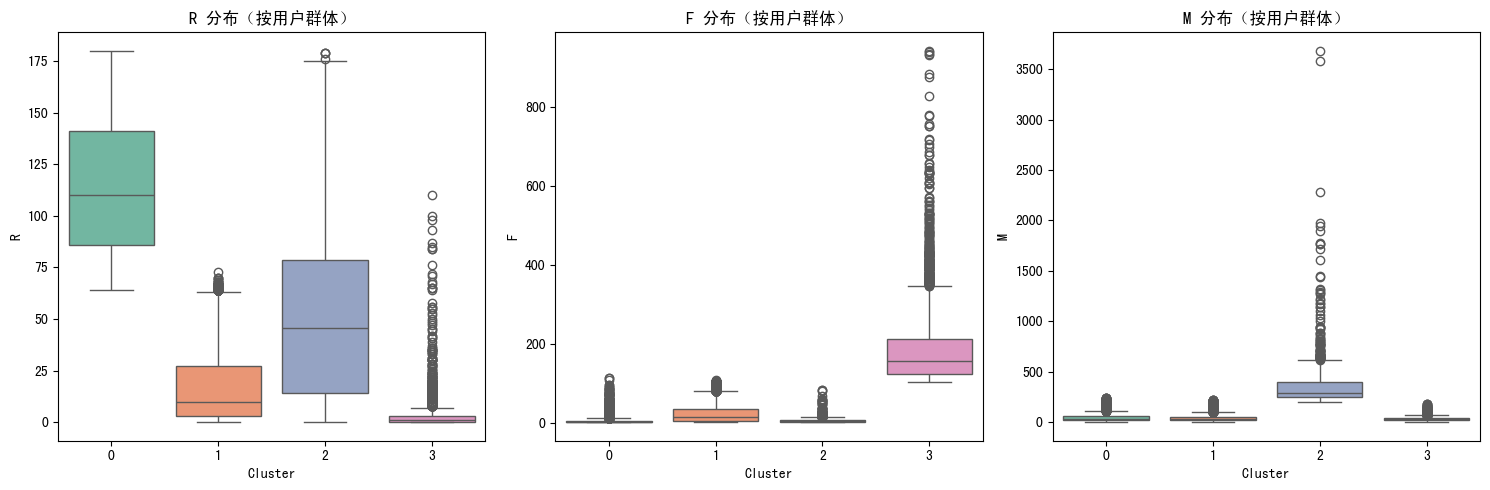

In [41]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(['R', 'F', 'M']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Cluster', y=col, data=RFM, palette='Set2')
    plt.title(f'{col} 分布（按用户群体）')

plt.tight_layout()
plt.show()


## 5️⃣ RFM 得分热力图

目的：查看不同 R、F、M 组合的用户分布，发现最优用户群。

📌 解释：

qcut() 将 R、F、M 分为 4 个评分（1-4），4 代表高价值用户。

heatmap() 直观显示 R-F 组合的用户消费金额（M）。

可以看到哪些群体的用户消费能力最强。

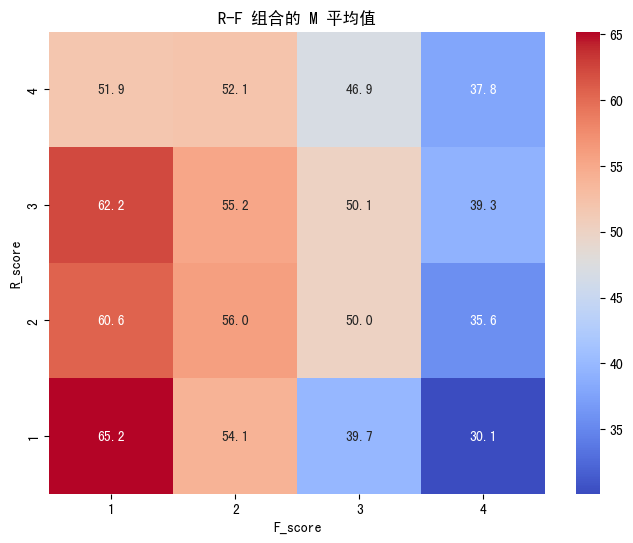

In [42]:

# RFM 评分（按百分位数）
RFM['R_score'] = pd.qcut(RFM['R'], q=4, labels=[4, 3, 2, 1])
RFM['F_score'] = pd.qcut(RFM['F'], q=4, labels=[1, 2, 3, 4])
RFM['M_score'] = pd.qcut(RFM['M'], q=4, labels=[1, 2, 3, 4])

# 计算 R 和 F 组合的平均 M 值
rfm_pivot = RFM.pivot_table(index='R_score', columns='F_score', values='M', aggfunc=np.mean)

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_pivot, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('R-F 组合的 M 平均值')
plt.show()


## 用户价值分类统计

In [43]:
sql = """
with DESC_RFM20 as(
SELECT 
	R,F,M,
	PERCENT_RANK() over ( ORDER BY R ) AS PERCENT_R,
	PERCENT_RANK() over ( ORDER BY F DESC ) AS PERCENT_F, 
	PERCENT_RANK() over ( ORDER BY M DESC ) AS PERCENT_M
FROM RFM)

SELECT 'R' as tag, MAX(R) as '阈值'
FROM DESC_RFM20
WHERE PERCENT_R<=0.20
UNION 
SELECT 'F' as tag, MIN(F) as '阈值'
FROM DESC_RFM20
WHERE PERCENT_F<=0.2
UNION
SELECT 'M' as tag, MIN(M) as '阈值'
FROM DESC_RFM20
WHERE PERCENT_M<=0.2

"""
query_df(sql)



,tag,阈值
0,F,48.0000000000
1,R,2.0000000000
2,M,65.6200000000


In [44]:
sql = """
select 
coalesce(RFM.用户ID, tmp.用户ID) as 用户ID,
case when R<=5 and F>=28 and M>=76.86 then '重要价值客户'
when R<=5 and F>=28 and M<76.86 then '一般价值客户'
when R<=5 and F<28 and M>=76.86 then '重要发展客户'
when R<=5 and F<28 and M<76.86 then '一般发展客户'
when R>5 and F>=28 and M>=76.86 then '重要唤回客户'
when R>5 and F>=28 and M<76.86 then '一般唤回客户'
when R>5 and F<28 and M>=76.86 then '重要挽留客户'
when R>5 and F<28 and M<76.86 then '一般挽留客户'
when R is null then '不存在消费记录的用户'
end as '用户价值族群'
from RFM
FULL join (select distinct User_id 用户ID from user_coupon_receive) tmp on RFM.用户ID = tmp.用户ID
"""
user_RFM = query_df(sql)

user_RFM

,用户ID,用户价值族群
0,0e22c035960968d76081373133fdf55e,一般挽留客户
1,78a95eb83301f5f727f6141c8bb798a2,一般价值客户
2,6121622ad0d46fd2ea8d11fdbe761686,重要挽留客户
3,e3465919afd0c4e52c0db3506e0f0e36,一般挽留客户
4,e3c0372a7c967f12b721b2c3213b98db,一般发展客户
...,...,...
49668,edae8f646ef36f3146736735af306d6d,一般挽留客户
49669,8d2a60a7283d2462ec8e3c545af66d3a,一般挽留客户
49670,27ede92657665505db524f15cf6bdc3b,重要挽留客户
49671,adbd4f9aec407eff36bccf77b5ad9e07,重要挽留客户


In [45]:
sql = """
select 用户价值族群,count(用户ID) as 用户数,
concat(round(count(用户ID)/(SELECT COUNT(*) FROM user_RFM)*100,2),'%') as 用户数占比
from user_RFM
group by 用户价值族群
order by 用户价值族群;"""

query_df(sql)


,用户价值族群,用户数,用户数占比
0,一般价值客户,8772,17.66%
1,一般发展客户,4740,9.54%
2,一般唤回客户,4521,9.1%
3,一般挽留客户,21870,44.03%
4,不存在消费记录的用户,2465,4.96%
5,重要价值客户,618,1.24%
6,重要发展客户,834,1.68%
7,重要唤回客户,345,0.69%
8,重要挽留客户,5508,11.09%


# RFM + 用户转化分析

## 不同价值族群的转化漏斗

In [46]:
query('''

select
    count(distinct User_id) as getcoupons_users
    ,用户价值族群
from user_coupon_receive
left join user_RFM on User_id = 用户ID
where Coupon_id is not null
group by 2
''')

┌──────────────────┬──────────────────────┐
│ getcoupons_users │     用户价值族群     │
│      int64       │       varchar        │
├──────────────────┼──────────────────────┤
│             4649 │ 一般发展客户         │
│             4518 │ 一般唤回客户         │
│             5360 │ 重要挽留客户         │
│             2464 │ 不存在消费记录的用户 │
│              824 │ 重要发展客户         │
│            21211 │ 一般挽留客户         │
│              345 │ 重要唤回客户         │
│             8771 │ 一般价值客户         │
│              618 │ 重要价值客户         │
└──────────────────┴──────────────────────┘

In [47]:
sql = """
-- 所有用户
with t1 as 
(
    select
         count(distinct User_id) as all_users,用户价值族群
     from (
         SELECT * FROM
         (
          select User_id from order_detail
          union all
          select User_id from user_visit_detail
          union all
          select User_id from user_coupon_receive
         ) left join user_RFM on User_id = 用户ID
     )
     group by 2
),
-- 领券用户
t2 as(
select
    count(distinct User_id) as getcoupons_users
    ,用户价值族群
from user_coupon_receive
left join user_RFM on User_id = 用户ID
where Coupon_id is not null
group by 2
),
-- 首次用券核销用户
a1 as(
select
    User_id,
    用户价值族群,
    min(Pay_date) as first_date
from order_detail
left join user_RFM on User_id = 用户ID
where Coupon_id is not null
group by User_id, 用户价值族群),
-- 用券后复购用户
a2 as(
select
    count(distinct User_id) as second_user,
    用户价值族群
from a1
inner join 
(
    select * from order_detail
    where Coupon_id is not null
) as order_detail
using(User_id)
where order_detail.Pay_date	>first_date
group by 2
)
SELECT 
    t1.用户价值族群,
    t1.all_users AS 全体用户,
    getcoupons_users AS 领券用户,
    coalesce(首次用券核销用户, 0) AS 首次用券核销用户 ,
    coalesce(second_user, 0) AS 用券后复购用户
    
FROM 
    t1
LEFT JOIN 
    t2
ON t1.用户价值族群 = t2.用户价值族群
LEFT JOIN 
    (SELECT COUNT(DISTINCT User_id) AS 首次用券核销用户, 用户价值族群 FROM a1 GROUP BY 用户价值族群) AS a1_data
ON t1.用户价值族群 = a1_data.用户价值族群
LEFT JOIN a2
ON t1.用户价值族群 = a2.用户价值族群
WHERE t1.用户价值族群	is not null
"""

df = query_df(sql)

df

,用户价值族群,全体用户,领券用户,首次用券核销用户,用券后复购用户
0,一般发展客户,4740,4649,3378,2471
1,一般价值客户,8772,8771,8559,8382
2,重要价值客户,618,618,604,589
3,一般唤回客户,4521,4518,4390,4272
4,重要挽留客户,5508,5360,4002,1930
5,重要发展客户,834,824,677,481
6,一般挽留客户,21870,21211,12872,7475
7,重要唤回客户,345,345,339,324
8,不存在消费记录的用户,2465,2464,0,0


In [48]:
# 获取所有用户类型
user_types = df["用户价值族群"].tolist()

# 设置子图布局（2 列）
rows = (len(user_types) + 1) // 2  # 计算行数
fig = make_subplots(rows=rows, cols=2, subplot_titles=user_types)

# 定义颜色方案
color_palette = ['#FFD500', '#ffc000', '#ffab00', '#ff9500', '#ff8000']
line_colors = ["wheat", "wheat", "blue", "wheat", "wheat"]
# 遍历每个用户类型并绘制漏斗图
for idx, row in df.iterrows():
    funnel_data = [
        {"阶段": "全体用户", "人数": row["全体用户"]},
        {"阶段": "领券用户", "人数": row["领券用户"]},
        {"阶段": "首次用券核销用户", "人数": row["首次用券核销用户"]},
        {"阶段": "用券后复购用户", "人数": row["用券后复购用户"]}
    ]
    funnel_df = pd.DataFrame(funnel_data)

    # 计算相对初始值的百分比
    funnel_df["percent_initial"] = funnel_df["人数"] / funnel_df["人数"].max()

    trace = go.Funnel(
        x=funnel_df["人数"],
        y=funnel_df["阶段"],
        textinfo="value+percent initial",
        textposition="inside",
        marker=dict(
            color=color_palette[:len(funnel_df)],  # 限制颜色数量
            line=dict(width=[4, 2, 2, 3][:len(funnel_df)], color=line_colors[:len(funnel_df)])
        ),
        opacity=0.75,
        connector=dict(
            line=dict(color="royalblue", dash="dot", width=3)
        ),
        name=row["用户价值族群"]
    )

    # 确定子图位置
    row_num = (idx // 2) + 1
    col_num = (idx % 2) + 1
    fig.add_trace(trace, row=row_num, col=col_num)

# **调整图表尺寸，防止显示不全**
fig.update_layout(
    title=dict(text="📊 不同用户价值族群的转化漏斗", font=dict(size=26, family="Arial", color="darkblue")),
    plot_bgcolor="white",
    font=dict(size=16, family="Arial"),
    height=rows * 600,  # **动态调整高度**
    width=1400,  # **加宽图表**
    margin=dict(l=120, r=120, t=100, b=80),  # **增加边距，防止裁剪**
    showlegend=False  # 关闭全局图例
)

# 显示图表
fig.show()


复购率: 一般挽留客户(34%) < 重要挽留客户(35%) < 一般发展客户(52%) < 重要发展客户(58%)

其中一般挽留客户占总客户的44%, **是需要重点关注的目标**

1. 是不是人均领券次数太少了？
2. 优惠力度不够？优惠占比小？
3. 优惠门槛高？
4. 消费水平和消费券的优惠差距过大（分差）


## 不同用户价值族群的消费分布

In [49]:
wide_df = query_df('''
select t1.*, t2.用户价值族群 from order_detail t1
left join user_RFM t2 on t1.User_id = t2.用户ID
''')

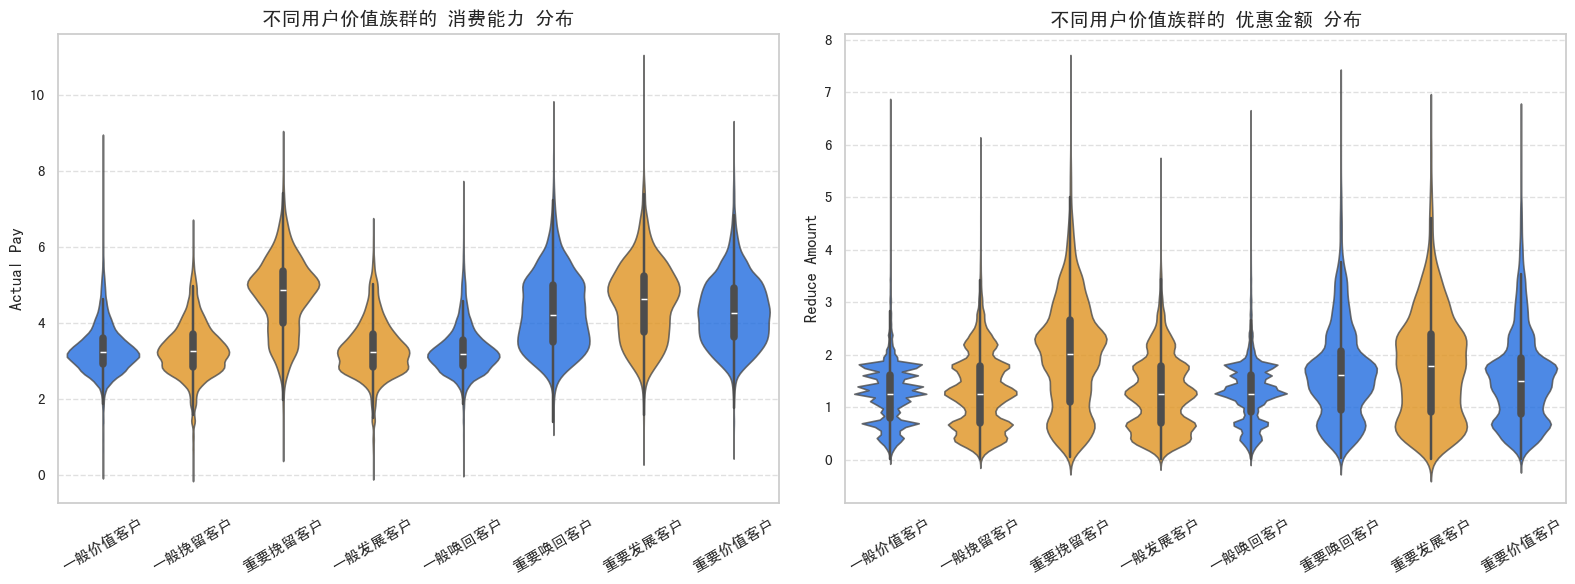

In [50]:


# 设置样式
sns.set_theme(style="whitegrid")


# 指定一个支持中文的字体 (如 SimHei)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或 'Microsoft YaHei', 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

color_mapping = {
    "重要挽留客户": "#FF9900",
    "重要发展客户": "#FF9900",
    "一般挽留客户": "#FF9900",
    "一般发展客户": "#FF9900",
    "一般价值客户": "#0066FF",
    "一般唤回客户": "#0066FF",
    "重要价值客户": "#0066FF",
    "重要唤回客户": "#0066FF"
}


# 创建画布
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
wide_df['Actual_pay_log'] = np.log1p(wide_df['Actual_pay'] + wide_df['Reduce_amount'])
wide_df['Reduce_amount_log'] = np.log1p(wide_df['Reduce_amount'])

# 绘制 Actual_pay 的小提琴图
sns.violinplot(x="用户价值族群", y="Actual_pay_log", data=wide_df[wide_df['Reduce_amount']!=0], ax=axes[0], 
               palette=color_mapping, inner="box", linewidth=1.2, alpha=0.8)
axes[0].set_title("不同用户价值族群的 消费能力 分布", fontsize=14)
axes[0].set_xlabel("")
axes[0].set_ylabel("Actual Pay", fontsize=12)
axes[0].tick_params(axis='x', rotation=30)

# 绘制 Reduce_amount 的小提琴图
sns.violinplot(x="用户价值族群", y="Reduce_amount_log", data=wide_df[wide_df['Reduce_amount']!=0], ax=axes[1], 
               palette=color_mapping, inner="box", linewidth=1.2, alpha=0.8)
axes[1].set_title("不同用户价值族群的 优惠金额 分布", fontsize=14)
axes[1].set_xlabel("")
axes[1].set_ylabel("Reduce Amount", fontsize=12)
axes[1].tick_params(axis='x', rotation=30)

# 添加网格
for ax in axes:
    ax.grid(axis="y", linestyle="--", alpha=0.6)

# 调整布局
plt.tight_layout()
plt.show()

结论:
1. 横线代表中位数，一般挽留客户消费水平处于中间位置，其中也有少部分人消费水平低于其他群体。  
2. 领到券的人，一般挽留客户的优惠水平略低于其他群体

In [51]:
query_df('''
select 
        用户价值族群, 
        coupon_type,
        count(*) as 消费次数, 
        sum(if(reduce_amount > 0, 1, 0)) as 优惠次数,
        sum(reduce_amount) * 100 / sum(actual_pay + reduce_amount) as 优惠比例
from wide_df
group by 1, 2
order by 优惠次数 asc
LIMIT 50
''')

,用户价值族群,Coupon_type,消费次数,优惠次数,优惠比例
0,重要价值客户,6.0000000000,357,0.0000000000,0.0000000000
1,重要唤回客户,6.0000000000,220,0.0000000000,0.0000000000
2,重要发展客户,6.0000000000,279,1.0000000000,0.0039345325
3,重要挽留客户,9.0000000000,1,1.0000000000,11.2026976396
4,重要发展客户,20013.0000000000,1,1.0000000000,1.9000000000
5,一般发展客户,0.0000000000,14,1.0000000000,0.7675814532
6,重要唤回客户,20014.0000000000,35,1.0000000000,0.0564652739
7,重要发展客户,9.0000000000,1,1.0000000000,8.1147040879
8,一般发展客户,4.0000000000,209,1.0000000000,0.9800932592
9,重要价值客户,10015.0000000000,1,1.0000000000,99.7142857143


In [52]:
wide_coupon_receive_df = query_df('''
select t1.*, t2.用户价值族群 from user_coupon_receive t1
left join user_RFM t2 on t1.User_id = t2.用户ID
where coupon_id is not null                                  
''')

In [53]:
query_df('''
select 
        用户价值族群, 
        count(*) as 领券次数, 
        sum(Price_limit) as 优惠券门槛,
        优惠券门槛 / 领券次数 as 人均门槛
from wide_coupon_receive_df
group by 1
order by 人均门槛 desc
''')

,用户价值族群,领券次数,优惠券门槛,人均门槛
0,重要唤回客户,28095,1977254.2400000002,70.3774422495
1,重要价值客户,59412,4150307.9600000009,69.8563919747
2,重要发展客户,27938,1874132.2400000002,67.0818326294
3,重要挽留客户,134340,8655225.5100000054,64.4277617240
4,不存在消费记录的用户,32388,1844636.7600000005,56.9543275287
5,一般发展客户,136510,6722328.8800000055,49.2442229873
6,一般挽留客户,470007,21924276.4899999797,46.6467020491
7,一般唤回客户,355740,15531050.5200000033,43.6584317760
8,一般价值客户,934956,40790025.7799998894,43.6277490919


# 优惠券RFM

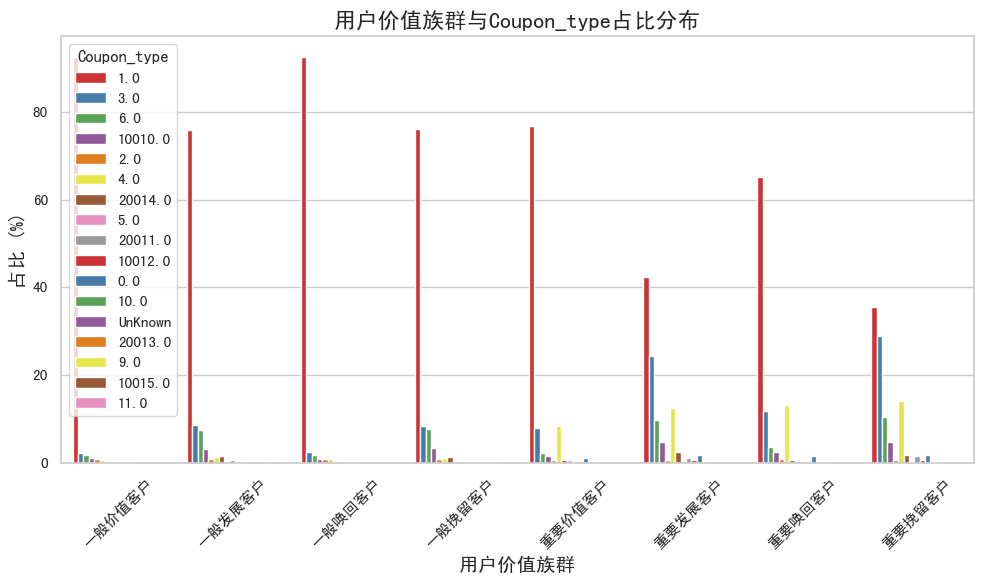

In [54]:
result_df = query_df('''
select a1.cnt * 100 /a2.cnt as 占比 , a1.用户价值族群, COALESCE(a1.Coupon_type::STRING, 'UnKnown') as Coupon_type
from
(
    select   count(*) as cnt, 用户价值族群, Coupon_type from wide_df
    where coupon_id is not null                 
    group by 2,3
) a1 join
(
    select   count(*) as cnt, 用户价值族群 from wide_df
    where coupon_id is not null                 
    group by 2
) a2 using(用户价值族群)
order by 用户价值族群,占比	DESC
''')

# 绘制分布图
plt.figure(figsize=(10, 6))
sns.barplot(x='用户价值族群', y='占比', hue='Coupon_type', data=result_df, palette='Set1')

# 设置图表标题和标签
plt.title('用户价值族群与Coupon_type占比分布', fontsize=16)
plt.xlabel('用户价值族群', fontsize=14)
plt.ylabel('占比 (%)', fontsize=14)
plt.xticks(rotation=45)  # 旋转x轴标签
plt.tight_layout()

# 显示图表
plt.show()

/var/folders/t6/xmvwdhg96gsfj8tw02j7mgmr0000gn/T/ipykernel_74226/3574943240.py:26: UserWarning:

Glyph 9 (	) missing from font(s) SimHei.

/Users/liangkaixin/Documents/Notes/商业分析/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 9 (	) missing from font(s) SimHei.



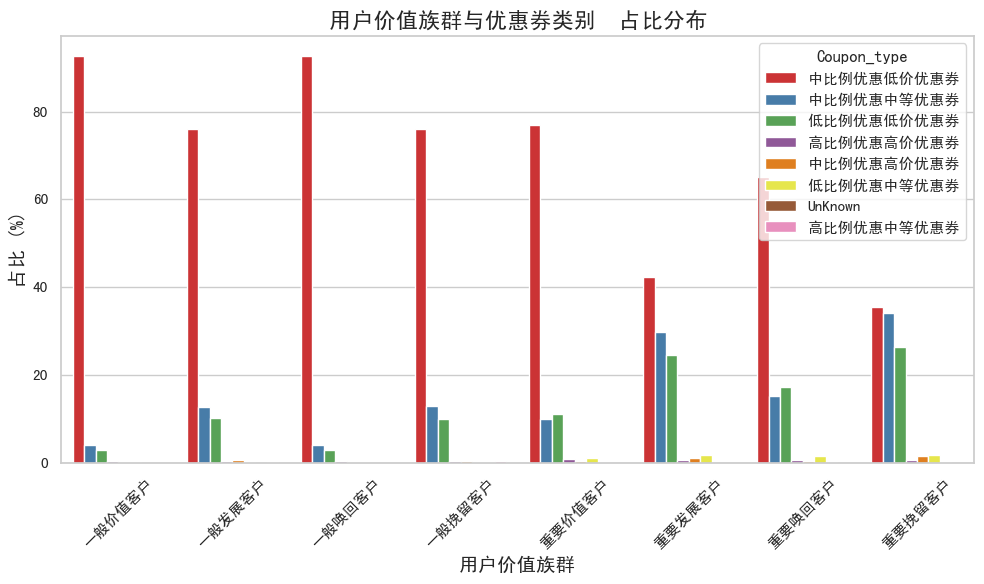

In [55]:
result_df = query_df('''
select a1.cnt * 100 /a2.cnt as 占比 , a1.用户价值族群, COALESCE(a1.Coupon_type::STRING, 'UnKnown') as Coupon_type
from
(
    select   count(*) as cnt, 用户价值族群, 优惠券类别	 as Coupon_type from wide_df
    where coupon_id is not null                 
    group by 2,3
) a1 join
(
    select   count(*) as cnt, 用户价值族群 from wide_df
    where coupon_id is not null                 
    group by 2
) a2 using(用户价值族群)
order by 用户价值族群,占比	DESC
''')

# 绘制分布图
plt.figure(figsize=(10, 6))
sns.barplot(x='用户价值族群', y='占比', hue='Coupon_type', data=result_df, palette='Set1')

# 设置图表标题和标签
plt.title('用户价值族群与优惠券类别	占比分布', fontsize=16)
plt.xlabel('用户价值族群', fontsize=14)
plt.ylabel('占比 (%)', fontsize=14)
plt.xticks(rotation=45)  # 旋转x轴标签
plt.tight_layout()

# 显示图表
plt.show()

## 不同用户价值族群使用的优惠券类型占比

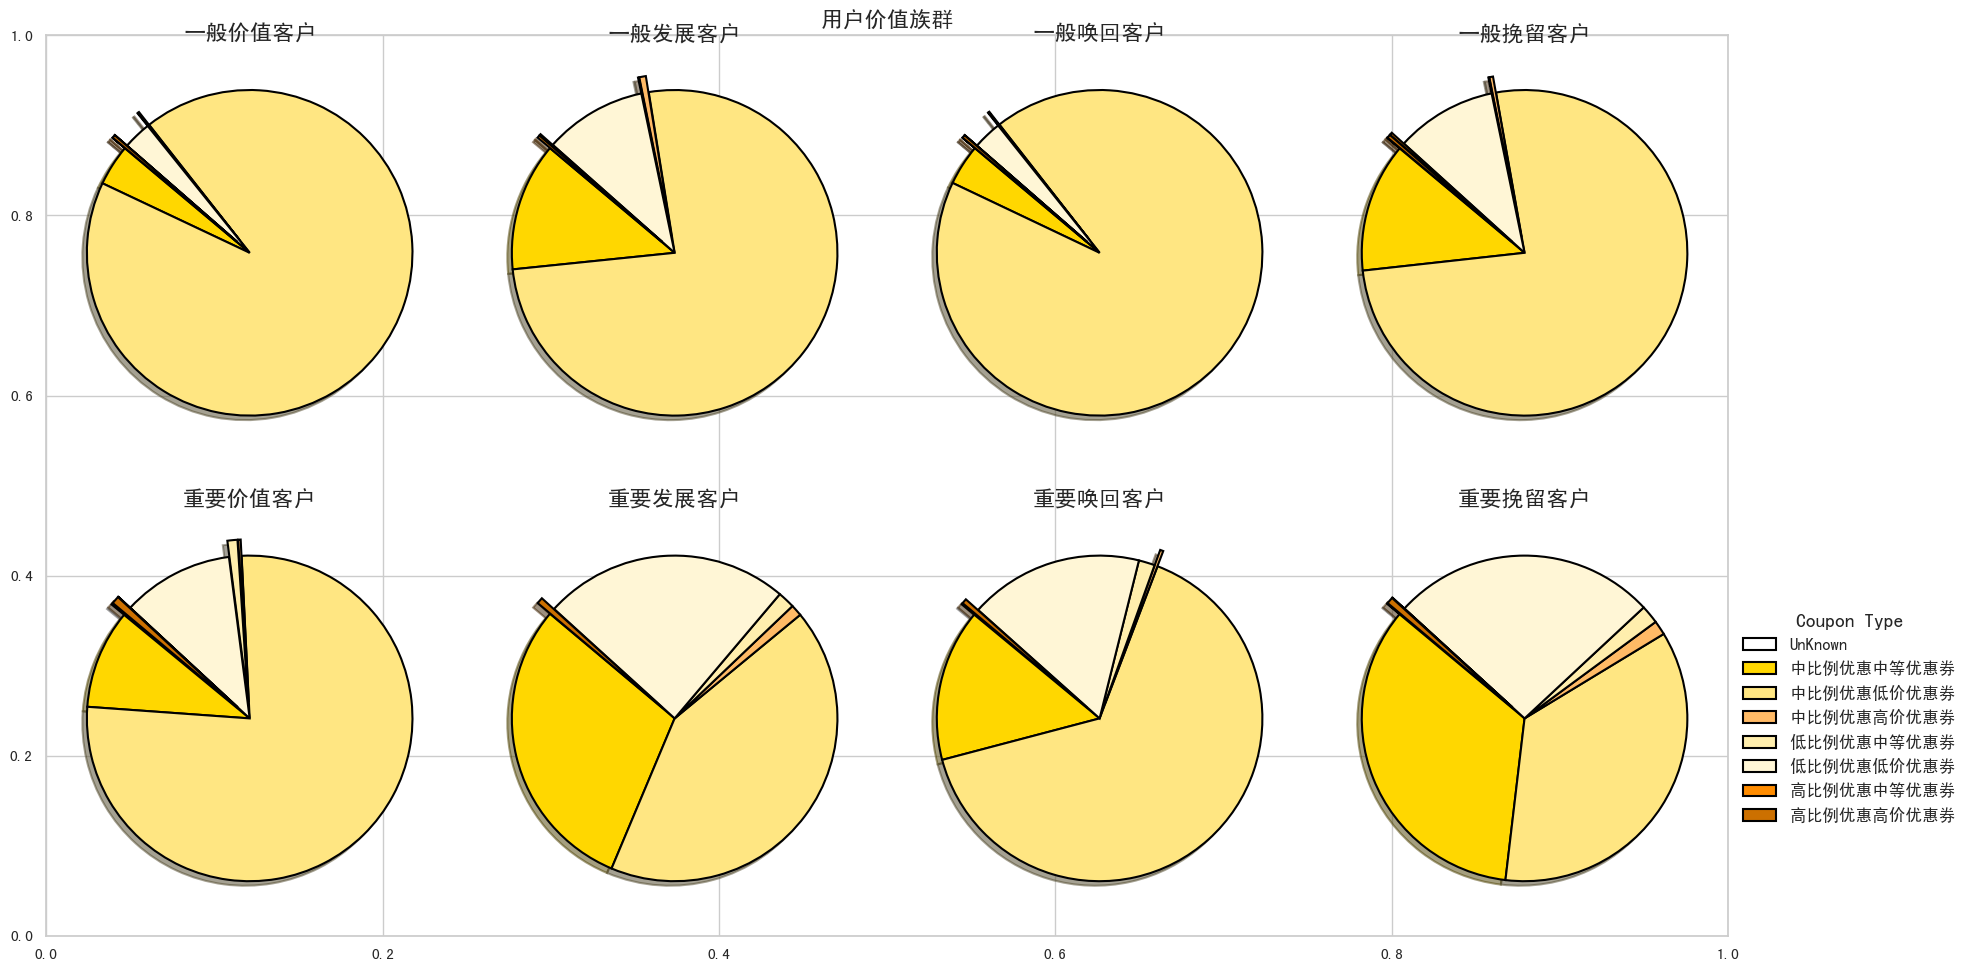

In [56]:
grouped_data = result_df.groupby(['用户价值族群', 'Coupon_type'])['占比'].sum().reset_index()

# 设置画布大小
plt.figure(figsize=(20, 10))

# 获取每个用户价值族群的独特值
user_groups = grouped_data['用户价值族群'].unique()

colors = ['#FFFACD', '#FFEB3B', '#FFDD44', '#FFD700', '#FFB300', '#F4A300', '#FFA500', '#FFFF00', '#FFD85C']
unique_coupon_types = grouped_data['Coupon_type'].unique()

# ['#FFD500', '#ffc000', '#ffab00', '#ff9500', '#ff8000', '#ff6b00']

color_mapping = {
    'UnKnown': '#ffffff',  # 浅灰色（未知）
    '低比例优惠低价优惠券': '#fff6d6',  # 浅黄色
    '低比例优惠中等优惠券': '#ffeead',  # 中等黄色
    '中比例优惠低价优惠券': '#ffe682',  # 亮黄色
    '中比例优惠中等优惠券': '#FFD700',  # 金色
    '中比例优惠高价优惠券': '#FFBA66',  # 深金色
    '高比例优惠中等优惠券': '#FF8C00',  # 橙黄色
    '高比例优惠高价优惠券': '#CC7000',  # 深橙色
}
plt.title(f'用户价值族群', fontsize=16, fontweight='bold')

# 循环绘制每个用户价值族群的饼图
for i, group in enumerate(user_groups):
    plt.subplot(2, 4, i + 1)  # 设置每个饼图的位置，这里我们假设有8个族群
    group_data = grouped_data[grouped_data['用户价值族群'] == group]
    explode = [0.1 if x < 1 else 0 for x in group_data['占比']]  # 如果占比小于1%就爆开

    # 获取颜色列表
    colors_for_group = [color_mapping[str(c)] for c in group_data['Coupon_type']]

    # 画饼图，不显示百分比
    wedges, texts = plt.pie(group_data['占比'], 
                            startangle=140,  # 设置饼图的起始角度
                            colors=colors_for_group,  # 更柔和的色彩
                            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # 添加黑色边框
                            explode = explode,
                            shadow=True)  # 添加阴影效果
    
    # 设置标题
    plt.title(f'{group}', fontsize=16, fontweight='bold')

    # 修改文本标签样式
    for text in texts:
        text.set(size=12, weight='bold', color='black')  # 黑色加粗的标签

# 设置类别显示在右侧
plt.legend(wedges, group_data['Coupon_type'], title="Coupon Type", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize=14, frameon=False)

# 设置整体布局
plt.tight_layout()
plt.show()

使用黄色系的颜色来表示不同的优惠券类型，并且重要性越高，颜色越深，为每种优惠券类型选择不同的黄色或金色系渐变颜色。

## 不同用户价值族群使用的优惠券类型占比(去除top1和Unkown)

,用户价值族群,Coupon_type,占比


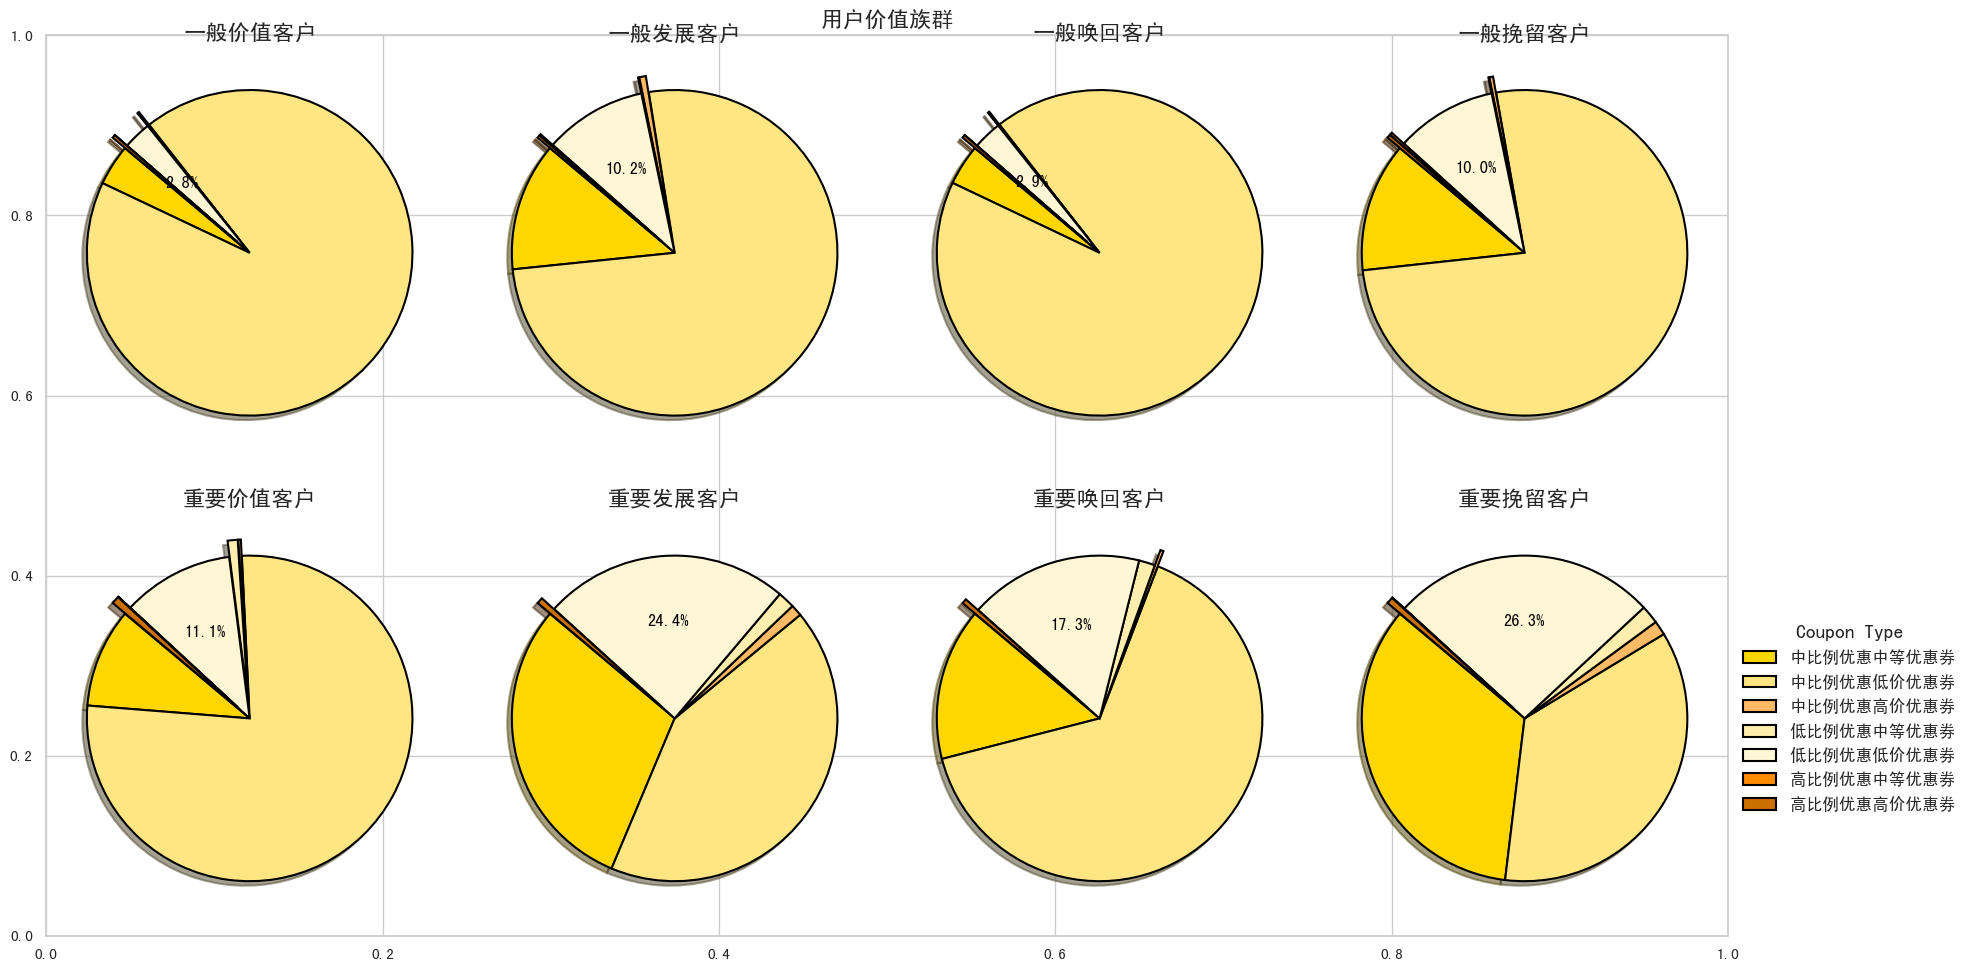

In [57]:
grouped_data = query_df('''
select a1.cnt * 100 /a2.cnt as 占比 , a1.用户价值族群, COALESCE(a1.Coupon_type::STRING, 'UnKnown') as Coupon_type
from
(
    select   count(*) as cnt, 用户价值族群, 优惠券类别	 as Coupon_type from wide_df
    where coupon_id is not null and 优惠券类别 is not null
    group by 2,3
) a1 join
(
    select   count(*) as cnt, 用户价值族群 from wide_df
    where coupon_id is not null                 
    group by 2
) a2 using(用户价值族群)
order by 用户价值族群,占比	DESC         
''').groupby(['用户价值族群', 'Coupon_type'])['占比'].sum().reset_index()
# 设置画布大小
plt.figure(figsize=(20, 10))

# 获取每个用户价值族群的独特值
user_groups = grouped_data['用户价值族群'].unique()

plt.title(f'用户价值族群', fontsize=16, fontweight='bold')


color_mapping = {
    'UnKnown': '#ffffff',  # 浅灰色（未知）
    '低比例优惠低价优惠券': '#fff6d6',  # 浅黄色
    '低比例优惠中等优惠券': '#ffeead',  # 中等黄色
    '中比例优惠低价优惠券': '#ffe682',  # 亮黄色
    '中比例优惠中等优惠券': '#FFD700',  # 金色
    '中比例优惠高价优惠券': '#FFBA66',  # 深金色
    '高比例优惠中等优惠券': '#FF8C00',  # 橙黄色
    '高比例优惠高价优惠券': '#CC7000',  # 深橙色
}

display(grouped_data[grouped_data['Coupon_type'] == '6.0'])

# 自定义autopct函数
def custom_autopct(pct, values, types):
    for val, ctype in zip(values, types):
        if ctype == '低比例优惠低价优惠券':  # 仅在 Coupon_type == 6.0 时显示
            return f'{pct:.1f}%'
    return ""



# 循环绘制每个用户价值族群的饼图
for i, group in enumerate(user_groups):
    plt.subplot(2, 4, i + 1)  # 设置每个饼图的位置，这里我们假设有8个族群
    group_data = grouped_data[grouped_data['用户价值族群'] == group]
    explode = [0.1 if x < 1 else 0 for x in group_data['占比']]  # 如果占比小于1%就爆开

    # 获取颜色列表
    colors_for_group = [color_mapping[str(c)] for c in group_data['Coupon_type']]


    # 画饼图，不显示百分比
    wedges, texts, autotexts  = plt.pie(group_data['占比'], 
                            startangle=140,  # 设置饼图的起始角度
                            colors=colors_for_group,  # 更柔和的色彩
                            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # 添加黑色边框
                            explode = explode,
                            autopct=lambda pct: custom_autopct(pct, group_data['占比'], group_data['Coupon_type']),
                            shadow=True)  # 添加阴影效果
    
    # 设置标题
    plt.title(f'{group}', fontsize=16, fontweight='bold')

    # 修改文本标签样式
    for text in texts:
        text.set(size=12, weight='bold', color='white')  # 黑色加粗的标签

    for autotext, ctype in zip(autotexts, group_data['Coupon_type']):
        if ctype != '低比例优惠低价优惠券':
            autotext.set_text("")  # 隐藏非 6.0 的百分比
        else:
            autotext.set_color("black")


# 设置类别显示在右侧
plt.legend(wedges, group_data['Coupon_type'], title="Coupon Type", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize=14, frameon=False)

# 设置整体布局
plt.tight_layout()
plt.show()

## 结论


1.  中比例低价优惠券，发放最多，我认为是促活用的。  
    因为它在活跃度较高的一般价值客户中，占比也是最大的
2.  低比例低价值优惠券会导致复购率降低，甚至导致客户流失。复购低的人群，往往是使用此类优惠券较多的人群。

策略：
 促活可以多发放中比例低价优惠券；降低流失率，应该减少降低无效券投放

# 风控

In [58]:
df = query_df("""
with t1 AS
(
    select count(*) as 领券总数,User_id AS 用户ID, Receive_date from user_coupon_receive
           WHERE Coupon_id IS NOT NULL
           group by 2, 3
)
SELECT * FROM t1 LEFT JOIN user_RFM USING(用户ID)
WHERE Receive_date IS NOT NULL
order by 领券总数 DESC
      """)
df.head(50)

,领券总数,用户ID,Receive_date,用户价值族群
0,50,64f7f49aa3a6f2d3bdf579dc20f5ee7b,2023-05-19,一般发展客户
1,50,135b607fa436226daf62b1cbf777c917,2023-01-16,一般唤回客户
2,45,135b607fa436226daf62b1cbf777c917,2023-05-27,一般唤回客户
3,42,02b1727ae62d6484c3bce3b666242ead,2023-03-01,一般价值客户
4,40,3c9e89409f0884ec9e905c40323230a4,2023-04-15,一般发展客户
5,37,ff110421440d8fcd5a53a784068c7610,2023-06-11,一般挽留客户
6,36,fec7766b5ea29350082a73e014f22358,2023-01-20,一般发展客户
7,34,da4a52ebccf7f143e38876c966b1ff38,2023-05-12,一般唤回客户
8,34,fec7766b5ea29350082a73e014f22358,2023-03-18,一般发展客户
9,34,ff110421440d8fcd5a53a784068c7610,2023-06-15,一般挽留客户


In [59]:
query_df("""select sum(Reduce_amount) as 总优惠, sum(Actual_pay) as 总支出, User_id  from order_detail
       WHERE Coupon_id IS NOT NULL 
       AND User_id in ('8ebe6816c6b51ad2c3afed2812a053b5', 'b083832263c1b4225990438b03056786', 'bc326638e3ef950e4377b0113afeab3c')
       group by 3
       -- order by cnt DESC
      """)

,总优惠,总支出,User_id
0,458.0000000000,5513.2000000000,bc326638e3ef950e4377b0113afeab3c
1,8.0000000000,23.8000000000,b083832263c1b4225990438b03056786
2,615.5000000000,7269.9300000000,8ebe6816c6b51ad2c3afed2812a053b5


In [60]:
query_df("""select *  from order_detail
       WHERE User_id in ('b083832263c1b4225990438b03056786')
      """)

,User_id,Shop_id,Order_id,Coupon_id,Coupon_type,Biz_code,Pay_date,Actual_pay,Reduce_amount,优惠券类别
0,b083832263c1b4225990438b03056786,b96db70b506332a7a4f44c156cb4ca1b,56d7a4c731ab3923c4ff3007b21fc662,None,NaN,D,2023-06-16,26.9000000000,0.0000000000,None
1,b083832263c1b4225990438b03056786,b96db70b506332a7a4f44c156cb4ca1b,ea2da07a9a424042b9594caad4918f90,None,NaN,D,2023-06-13,21.9000000000,0.0000000000,None
2,b083832263c1b4225990438b03056786,74ffd5ce40ba21c957ddb90b0e6f3f1a,c5a3728a57b6c6261a8446b1df2e94f1,None,NaN,D,2023-06-27,24.2800000000,0.0000000000,None
3,b083832263c1b4225990438b03056786,6791fffb08d1b564733985c881280191,020f2f6488f87d4039e5d9fb97fc0533,df8e3a90599dd80c9d69d5533d472560,1.0000000000,D,2023-04-19,23.8000000000,8.0000000000,中比例优惠低价优惠券
4,b083832263c1b4225990438b03056786,6791fffb08d1b564733985c881280191,020f2f6488f87d4039e5d9fb97fc0533,None,NaN,D,2023-04-19,23.8000000000,0.0000000000,None


In [61]:
cheats_user = query_df("""
select User_id, Receive_date::Date AS Receive_date from user_coupon_receive
WHERE User_id in ('b083832263c1b4225990438b03056786')
      """)

In [62]:


# 统计每个 Receive_date 的出现次数
date_counts = cheats_user['Receive_date'].value_counts().sort_index().reset_index()
date_counts.columns = ['Receive_date', 'Count']

# 创建一个交互式散点图
fig = px.scatter(date_counts, x='Receive_date', y='Count', 
                 labels={'Receive_date': 'Receive Date', 'Count': 'Count'},
                 title="用户b083832263c1b4225990438b03056786的领券记录")

# 显示点的坐标
fig.update_traces(marker=dict(color='red', opacity=0.6),
                  hovertemplate='Date: %{x}<br>Count: %{y}<extra></extra>')

# 显示图表
fig.show()


# 模型

## Part 1 概述

### 标签
用户是否会复购

### 优惠券特征

1. 被使用次数
2. 被使用金额
3. 优惠金额
4. 优惠金额占比
5. 优惠券类型
6. 优惠券复购率

### 用户特征

1. 用户领取优惠券次数
2. 用户获得优惠券但没有消费的次数
3. 用户获得优惠券并核销次数
4. 复购率
5. 复购周期
6. 用户群体类型
7. 注册时长

## Part 2 标签构建

In [191]:
sql = """
    select
        *exclude(Pay_date),
        Pay_date::date as Pay_date,
        优惠券类别,
        用户价值族群,
        lead(优惠券类别) over (partition by User_id order by Pay_date::date) as next_优惠券类别,
        lead(Coupon_id) over (partition by User_id order by Pay_date::date) as next_coupon_id,
        lead(Coupon_type) over (partition by User_id order by Pay_date::date) as next_Coupon_type,
        case when next_coupon_id is not null then 1 else 0 end as 是否复购
    from wide_df
;

"""

train_data  = query_df(sql)

In [192]:
from IPython.display import display, HTML
import math

# 自定义列数
n_cols = 5  # 想分几列就改这里

# 获取查询结果
df = query_df("""
    select round(sum(是否复购) * 100 / count(*), 2)::FLOAT as 复购率, 
           Coupon_type::INT as Coupon_type, 
           优惠券类别, 
           用户价值族群
    from train_data    
    where Coupon_type is not null      
    group by 2, 3, 4      
    order by Coupon_type, 复购率, 用户价值族群 desc                   
""")

# 计算每列的行数
rows_per_col = math.ceil(len(df) / n_cols)

# 拆分为多个子 DataFrame
dfs = [df.iloc[i * rows_per_col:(i + 1) * rows_per_col] for i in range(n_cols)]

# 转成 HTML
htmls = [subdf.to_html(index=False) for subdf in dfs]

# 拼接成横向展示的 HTML
html_output = '<div style="display: flex; gap: 10px;">'
for html in htmls:
    html_output += f'<div style="flex: 1;">{html}</div>'
html_output += '</div>'

# 显示
display(HTML(html_output))


复购率,Coupon_type,优惠券类别,用户价值族群
11.7600002289,0,低比例优惠中等优惠券,一般挽留客户
14.2899999619,0,低比例优惠中等优惠券,一般发展客户
22.4500007629,0,低比例优惠中等优惠券,重要发展客户
23.0000000000,0,低比例优惠中等优惠券,重要挽留客户
31.4699993134,0,低比例优惠中等优惠券,一般价值客户
33.3300018311,0,低比例优惠中等优惠券,重要价值客户
33.3300018311,0,低比例优惠中等优惠券,一般唤回客户
33.6599998474,0,低比例优惠中等优惠券,重要唤回客户
23.4500007629,1,中比例优惠低价优惠券,重要挽留客户
23.5699996948,1,中比例优惠低价优惠券,重要发展客户


## Part 3 特征工程

In [194]:
train_data.head(5)

,User_id,Shop_id,Order_id,Coupon_id,Coupon_type,Biz_code,Actual_pay,Reduce_amount,优惠券类别,用户价值族群,Actual_pay_log,Reduce_amount_log,Pay_date,优惠券类别_1,用户价值族群_1,next_优惠券类别,next_coupon_id,next_Coupon_type,是否复购
0,9520a932cd79c952c1f4555ae1d2fedc,7550d9c1ef1e3db78ad6a37fa2cd9243,b7a7240fd7d3ed8ed7e5f15b520a1ce1,None,NaN,D,29.5000000000,0.0000000000,None,一般价值客户,3.4177266836,0.0000000000,2023-04-06,None,一般价值客户,None,None,NaN,0
1,9520a932cd79c952c1f4555ae1d2fedc,2ada2f83375207b727b13c0062476ac4,e8107199a708ff092071515e3577a9e1,None,NaN,D,29.4000000000,0.5200000000,None,一般价值客户,3.4314032237,0.4187103349,2023-04-06,None,一般价值客户,None,None,NaN,0
2,9520a932cd79c952c1f4555ae1d2fedc,0e044139182fcf8efd31986105dde5d5,d1f6536632f023a097885c015cb5a90b,None,NaN,D,24.0000000000,0.0000000000,None,一般价值客户,3.2188758249,0.0000000000,2023-04-07,None,一般价值客户,None,None,NaN,0
3,9520a932cd79c952c1f4555ae1d2fedc,0e044139182fcf8efd31986105dde5d5,a00153b3e64e712244722f355b1effc3,None,NaN,D,30.9000000000,0.0000000000,None,一般价值客户,3.4626060098,0.0000000000,2023-04-08,None,一般价值客户,None,None,NaN,0
4,9520a932cd79c952c1f4555ae1d2fedc,0e044139182fcf8efd31986105dde5d5,76417c49260f5295bc14f3aadf8a8568,None,NaN,D,30.9000000000,0.0000000000,None,一般价值客户,3.4626060098,0.0000000000,2023-04-09,None,一般价值客户,None,None,NaN,0


In [220]:
# 1. 用户复购率
# 2. 用户在Coupon_type下的复购率
# 3. 用户核销率
fea = query_df('''
select 
train_data.*exclude(Coupon_type),
train_data.Coupon_type::varchar as Coupon_type,

              
count(*) over (partition by train_data.User_id) * 100 / coalesce(用户领券数, 0)  用户核销率,                   
sum(是否复购) over (partition by train_data.User_id, train_data.Coupon_type) * 100 / count(*) over (partition by train_data.User_id, train_data.Coupon_type) as 用户在此类优惠券下的复购率,
sum(Reduce_amount) over (partition by train_data.User_id, train_data.Coupon_type) * 100/ sum(Actual_pay + Reduce_amount) over (partition by train_data.User_id, train_data.Coupon_type)  as 用户在此类优惠券下的优惠占比,      


sum(是否复购) over (partition by train_data.Coupon_type) * 100  / count(*) over (partition by train_data.Coupon_type) as 优惠券复购率,               
count(*) over (partition by train_data.Coupon_type) * 100 / coalesce(优惠券发放数, 0)  优惠券核销率,
sum(Reduce_amount) over (partition by train_data.Coupon_type) * 100/ sum(Actual_pay + Reduce_amount) over (partition by train_data.Coupon_type)  as 此类优惠券的优惠占比,
      
sum(Reduce_amount) over (partition by train_data.Coupon_id) * 100/ sum(Actual_pay + Reduce_amount) over (partition by train_data.Coupon_id)  as 此优惠券的优惠占比                              
                                                  
from train_data
left join(select User_id, count(*) 用户领券数 from user_coupon_receive group by 1) t1 on train_data.User_id = t1.User_id                   
left join(select Coupon_type, count(*) 优惠券发放数 from user_coupon_receive group by 1) t2 on train_data.Coupon_type = t2.Coupon_type                

where train_data.Coupon_type is not null         
''')

In [221]:
fea.columns.to_list()

['User_id',
 'Shop_id',
 'Order_id',
 'Coupon_id',
 'Biz_code',
 'Actual_pay',
 'Reduce_amount',
 '优惠券类别',
 '用户价值族群',
 'Actual_pay_log',
 'Reduce_amount_log',
 'Pay_date',
 '优惠券类别_1',
 '用户价值族群_1',
 'next_优惠券类别',
 'next_coupon_id',
 'next_Coupon_type',
 '是否复购',
 'Coupon_type',
 '用户核销率',
 '用户在此类优惠券下的复购率',
 '用户在此类优惠券下的优惠占比',
 '优惠券复购率',
 '优惠券核销率',
 '此类优惠券的优惠占比',
 '此优惠券的优惠占比']

## Part 4 模型

我们会用：

📦 scikit-learn

🧠 模型：LogisticRegression（逻辑回归，快速可解释）

🔍 特征：Coupon_type, 优惠券类别, 用户价值族群, next_优惠券类别, next_Coupon_type 等等

🧪 切分训练 / 测试集，评估准确率、召回率等



In [230]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 特征列（可以加更多你觉得重要的）
feature_cols = [
    # 'User_id',
    # 'Coupon_id',
    # 'Pay_date',
    '优惠券类别',
    # '用户价值族群',
    # 'next_优惠券类别',
    # 'next_coupon_id',
    # 'next_Coupon_type',
    'Coupon_type',
    '用户核销率',
    '用户在此类优惠券下的复购率',
    '优惠券复购率',
    '优惠券核销率',
    '用户在此类优惠券下的优惠占比',
    '此类优惠券的优惠占比',
    '此优惠券的优惠占比'
 ]

# 标明哪些是类别特征（CatBoost 可以直接处理）
cat_features = [
    # '用户价值族群',
    '优惠券类别',
    # 'Coupon_type'
]


# 丢掉缺失目标行（标签没缺也OK）
df_model = fea.dropna(subset=['优惠券类别'])

# 特征 + 标签
X = df_model[feature_cols]
y = df_model['是否复购']

# 划分训练集 / 测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)



# 建模
model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    eval_metric='F1',
    random_seed=42,
    verbose=50
)

# 拟合
model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), verbose=50)

# 预测
y_pred = model.predict(X_test)

# 输出结果
print(classification_report(y_test, y_pred))


0:	learn: 0.2573504	test: 0.2554246	best: 0.2554246 (0)	total: 70.1ms	remaining: 21s
50:	learn: 0.3214085	test: 0.3189272	best: 0.3189272 (50)	total: 2.79s	remaining: 13.6s
100:	learn: 0.3276372	test: 0.3258103	best: 0.3258103 (100)	total: 5.23s	remaining: 10.3s
150:	learn: 0.3270367	test: 0.3249316	best: 0.3260667 (101)	total: 7.69s	remaining: 7.59s
200:	learn: 0.3273544	test: 0.3255151	best: 0.3260667 (101)	total: 10.1s	remaining: 4.97s
250:	learn: 0.3280593	test: 0.3258080	best: 0.3260667 (101)	total: 12.5s	remaining: 2.44s
299:	learn: 0.3287711	test: 0.3266151	best: 0.3266341 (298)	total: 15.1s	remaining: 0us

bestTest = 0.3266341375
bestIteration = 298

Shrink model to first 299 iterations.
              precision    recall  f1-score   support

           0       0.69      0.95      0.80    124018
           1       0.72      0.21      0.33     67931

    accuracy                           0.69    191949
   macro avg       0.70      0.58      0.56    191949
weighted avg       0.70

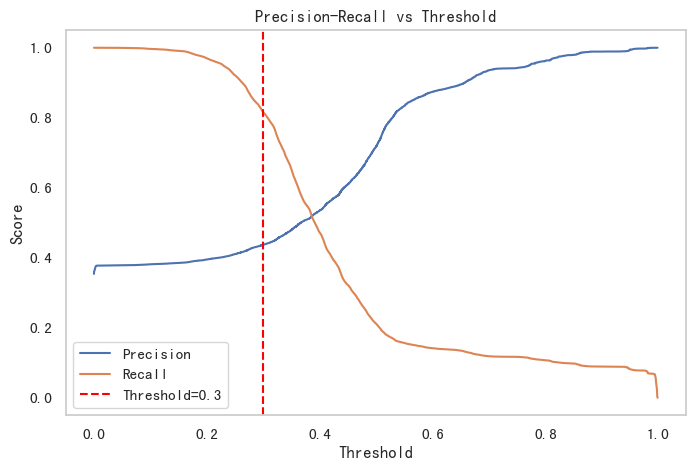

In [231]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.axvline(x=0.3, color='red', linestyle='--', label='Threshold=0.3')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.grid()
plt.show()


In [232]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,用户在此类优惠券下的复购率,81.2997303654
1,优惠券复购率,5.6868594536
2,优惠券类别,3.0069474692
3,用户核销率,2.3678478861
4,Coupon_type,1.9523072000
5,优惠券核销率,1.8432244646
6,此类优惠券的优惠占比,1.3471976073
7,此优惠券的优惠占比,1.2608870207
8,用户在此类优惠券下的优惠占比,1.2349985332
